<a href="https://colab.research.google.com/github/gabrieladamasceno/Model_Attacks/blob/main/Heatmap_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io

In [80]:
df_test= """Model,Ataque Zero-Day,Accuracy,F1,Precision,Recall,Time,CPU,Memory,Energy,ZD - Accuracy,ZD - F1,ZD - Precision,ZD - Recall,ZD - Time,ZD - CPU,ZD - Memory,ZD - Energy
Decision Tree,tcp_ack,0.959482,0.977021,0.998296,0.956634,1.12888,0.672727,2806.2,2.74951,0.920823,0.958779,1,0.920823,1.11275,1.57273,2808.55,34.6296
Decision Tree,syn,0.967682,0.981765,0.997801,0.966237,1.13122,12.8455,2754.91,19181.6,0.994189,0.997086,1,0.994189,1.11512,0.781818,2754.93,4.26313
Decision Tree,icmp,0.960477,0.977571,0.999535,0.95655,1.12962,0.563636,3279.59,1.61815,0.656432,0.792585,1,0.656432,1.11083,0.9,3279.59,6.47836
Decision Tree,slowloris,0.924218,0.956102,0.99922,0.91655,1.13027,7.48182,3053.04,3786.97,0.202184,0.336362,1,0.202184,1.11132,0.663636,3053.04,2.59848
Decision Tree,udp,0.885081,0.931938,0.998369,0.873796,1.12931,0.345455,3086.38,0.372458,0.330798,0.497142,1,0.330798,1.11295,0.454545,3086.38,0.836179
Decision Tree,ssh,0.957968,0.97612,0.999204,0.954079,1.12967,0.790909,3167.33,4.47117,0.0397511,0.0764628,1,0.0397511,1.11034,10.6273,3167.33,10661.3
Decision Tree,ftp,0.961327,0.978071,0.999197,0.957819,1.13193,0.681818,3186.65,2.87021,0.409747,0.581306,1,0.409747,1.00984,0.36,3186.65,0.376921
Decision Tree,portscan_tcp,0.955712,0.974818,0.998696,0.952056,1.13034,7.89091,3161.34,4443.03,0.806341,0.892789,1,0.806341,1.11189,6.14545,3161.34,2064.5
Decision Tree,os_fingerprinting,0.958186,0.976249,0.999093,0.954427,1.13069,1.00909,3315.04,9.29443,0.781122,0.877112,1,0.781122,1.11155,0.909091,3315.04,6.68101
Decision Tree,portscan_udp,0.957789,0.976017,0.999153,0.953928,1.13121,0.9,3140.54,6.59721,0.534895,0.696979,1,0.534895,1.11153,0.672727,3140.54,2.70724
Decision Tree,http_flood,0.96314,0.979122,0.999085,0.959942,1.13128,1.36364,2934.11,22.9485,0.999823,0.999911,1,0.999823,1.11316,0.681818,2934.12,2.82263
Decision Tree,dir_bruteforce,0.960292,0.977474,0.999011,0.956847,1.13144,1.01818,3402.87,9.55427,0.733007,0.845937,1,0.733007,1.11078,14.5545,3402.87,27397.6
Decision Tree,xss,0.962511,0.978754,0.999275,0.95906,1.13099,1.24545,3167.11,17.4796,0.252604,0.403326,1,0.252604,1.11089,0.781818,3167.12,4.24698
Decision Tree,sql_injection,0.962148,0.978545,0.999255,0.958676,1.13093,1.22727,3361.1,16.7244,0.133929,0.23622,1,0.133929,1.11135,1.57273,3361.1,34.586
Random Forest,tcp_ack,0.96408,0.979669,0.998915,0.96115,2.51161,0.681818,2783.33,6.36867,0.968041,0.983761,1,0.968041,1.30533,1.47273,2785.51,33.3562
Random Forest,syn,0.966737,0.98121,0.998446,0.964558,2.53425,0.672727,2758.12,6.17244,0.994603,0.997294,1,0.994603,1.48622,0.672727,2758.12,3.61985
Random Forest,icmp,0.964419,0.979864,0.998942,0.961501,2.52058,0.554545,3239.84,3.43877,0.709011,0.829732,1,0.709011,1.21009,0.681818,3239.84,3.06841
Random Forest,slowloris,0.943228,0.967479,0.999008,0.937879,2.52727,0.690909,3344,6.66814,0.508679,0.674337,1,0.508679,1.26314,11.9727,3344.01,17342.8
Random Forest,udp,0.952222,0.972771,0.999059,0.94783,2.50877,0.663636,3096.07,5.866,0.840251,0.913192,1,0.840251,1.35431,10.8182,3096.07,13717.4
Random Forest,ssh,0.96124,0.978027,0.998882,0.958026,2.53039,1.00909,3307.43,20.8002,0.0248877,0.0485666,1,0.0248877,1.1993,0.790909,3307.43,4.74674
Random Forest,ftp,0.96533,0.980391,0.998883,0.962571,2.54875,8.90909,3191.18,14418.4,0.630325,0.773251,1,0.630325,1.08602,1.13,3191.2,12.5361
Random Forest,portscan_tcp,0.965704,0.980609,0.998747,0.963119,2.50774,8.46364,3066.52,12163.1,0.998031,0.999015,1,0.998031,1.23662,1.15455,3066.52,15.2251
Random Forest,os_fingerprinting,0.965034,0.98022,0.998896,0.962229,2.5503,0.336364,3186.65,0.776441,0.917822,0.95715,1,0.917822,1.2253,0.909091,3186.65,7.36469
Random Forest,portscan_udp,0.956324,0.975172,0.998828,0.95261,2.52617,0.563636,3217.91,3.61868,0.220962,0.361947,1,0.220962,1.18964,1.01818,3217.91,10.0457
Random Forest,http_flood,0.964141,0.979705,0.998895,0.961237,2.5311,0.681818,3113.58,6.41807,0.999823,0.999911,1,0.999823,1.25968,2.4,3113.58,139.311
Random Forest,dir_bruteforce,0.953528,0.973543,0.99874,0.949586,2.50433,1.22727,3346.86,37.0344,0.255286,0.406737,1,0.255286,1.19464,13.5636,3346.86,23848.2
Random Forest,xss,0.965127,0.980275,0.998813,0.962413,2.46575,0.672727,3055.24,6.0056,0.216146,0.35546,1,0.216146,1.18823,0.909091,3055.24,7.14191
Random Forest,sql_injection,0.964918,0.980154,0.998863,0.962133,2.52149,0.681818,3274.53,6.3937,0.241071,0.388489,1,0.241071,1.18015,14.5636,3274.53,29163.2
Catboost,tcp_ack,0.967839,0.981835,0.99896,0.965287,3.44649,0.781818,3196.33,13.176,0.973902,0.986779,1,0.973902,1.41352,13.6636,3104.78,28846.4
Catboost,syn,0.970006,0.983082,0.99881,0.967841,3.5018,6.69091,3064.58,8391.44,0.994465,0.997225,1,0.994465,1.82642,3.03636,3011.88,409.026
Catboost,icmp,0.96696,0.981326,0.999115,0.964159,3.46623,1.9,3758.31,190.199,0.744531,0.85356,1,0.744531,1.15838,1.01818,3653.14,9.78173
Catboost,slowloris,0.945128,0.968598,0.999127,0.93988,3.43518,1.34545,3566.23,66.9339,0.485622,0.653763,1,0.485622,1.26224,7.13636,3454.66,3669.98
Catboost,udp,0.933557,0.961717,0.999291,0.926865,3.47861,0.336364,3530.8,1.05906,0.680065,0.80957,1,0.680065,1.46042,12.4909,3453.49,22769.4
Catboost,ssh,0.966409,0.981009,0.999095,0.963566,3.47056,1.35455,3707.77,69.0035,0.219841,0.360442,1,0.219841,1.14198,0.781818,3602.84,4.36583
Catboost,ftp,0.96638,0.980991,0.999145,0.963486,3.47451,0.454545,3864.93,2.61045,0.412996,0.584568,1,0.412996,1.03753,1.23,3767.21,15.4456
Catboost,portscan_tcp,0.969196,0.982616,0.998905,0.966849,3.45512,1.47273,3818.54,88.2917,0.998132,0.999065,1,0.998132,1.26549,0.9,3715.68,7.38032
Catboost,os_fingerprinting,0.96839,0.98215,0.99906,0.965802,3.44687,0.672727,3833.02,8.39522,0.932477,0.965059,1,0.932477,1.21536,0.672727,3733.49,2.96013
Catboost,portscan_udp,0.96817,0.982024,0.99898,0.965634,3.44416,0.909091,3894.27,20.7012,0.958816,0.978975,1,0.958816,1.14955,0.563636,3790.64,1.6467
Catboost,http_flood,0.969095,0.98256,0.998762,0.966875,3.44483,1.68182,3786.16,131.098,0.999823,0.999911,1,0.999823,1.47555,1.24545,3701.68,22.8049
Catboost,dir_bruteforce,0.95952,0.977026,0.999037,0.955964,3.45821,11.2091,3883.54,38963.1,0.44924,0.619966,1,0.44924,1.16464,1.14545,3780.06,14.0028
Catboost,xss,0.968132,0.982,0.99912,0.965457,3.3998,1.25455,3795.02,53.7035,0.25651,0.40829,1,0.25651,1.12643,14.3545,3689.87,26654.1
Catboost,sql_injection,0.96817,0.982024,0.99902,0.965596,3.41739,0.9,3925.03,19.9302,0.127976,0.226913,1,0.127976,1.1204,1.01818,3842.87,9.46106
MLP,tcp_ack,0.945641,0.969189,0.989699,0.949511,23.1711,1.02727,2995.31,200.952,0.960841,0.980029,1,0.960841,4.12184,0.681818,2974.67,10.4517
MLP,syn,0.9532,0.973618,0.988575,0.959108,23.3944,3.77273,3006.92,10050.1,0.99262,0.996296,1,0.99262,7.89483,2.51818,3009.5,1008.54
MLP,icmp,0.951262,0.972504,0.988263,0.95724,24.64,2.15455,3636.39,1971.51,0.72948,0.843583,1,0.72948,2.29474,1.63636,3311.86,80.4382
MLP,slowloris,0.938657,0.965053,0.990728,0.940675,23.9707,2.62727,3696.92,3477.66,0.824935,0.904071,1,0.824935,3.21756,1.25455,3697.58,50.8248
MLP,udp,0.846437,0.907839,0.987589,0.840007,24.4722,3.12727,3750.62,5987.7,0.129893,0.229921,1,0.129893,5.18859,4.19091,3474.43,3055.37
MLP,ssh,0.95132,0.97251,0.98925,0.956328,25.1542,4.02727,3725.36,13144.2,0.424127,0.595631,1,0.424127,2.25639,1.49091,3726.1,59.8214
MLP,ftp,0.9515,0.972613,0.989304,0.956476,24.2112,4.99091,4075.38,24079.4,0.585199,0.738328,1,0.585199,1.87677,1.38,3618.84,39.4583
MLP,portscan_tcp,0.94178,0.966981,0.988039,0.946802,25.6217,1.83636,3791.65,1269.33,0.775444,0.873521,1,0.775444,3.5959,9.81818,3791.53,27226.4
MLP,os_fingerprinting,0.947869,0.970533,0.988211,0.953477,22.2739,1.90909,3900.4,1239.84,0.814844,0.897977,1,0.814844,2.73939,0.9,3719.18,15.9761
MLP,portscan_udp,0.95264,0.973315,0.987802,0.959246,24.6181,2.85455,4088.64,4580.95,0.755857,0.860955,1,0.755857,2.36111,11.8,4088.64,31035.1
MLP,http_flood,0.953171,0.97362,0.987884,0.959762,24.2081,3.50909,3987.57,8368.23,0.999823,0.999911,1,0.999823,5.58339,2.07273,3688.18,397.754
MLP,dir_bruteforce,0.949653,0.971536,0.989439,0.954269,23.9435,3.28182,4000.69,6770.52,0.998777,0.999388,1,0.998777,2.43955,1.35455,4000.58,48.5043
MLP,xss,0.948803,0.971037,0.989582,0.953174,27.2984,2.25455,4075.07,2502.67,0.233073,0.378036,1,0.233073,2.14885,2.5,3905.65,268.607
MLP,sql_injection,0.952785,0.973393,0.988041,0.959172,23.1254,3.76364,4136.97,9862.84,0.169643,0.290076,1,0.169643,2.0256,1.6,4137.27,66.3749
Autoencoder,tcp_ack,0.389446,0.506475,0.930399,0.34794,16.4954,3.4,4448.52,5186.68,0.251478,0.40189,1,0.251478,3.53561,1.02727,4416.63,30.6628
Autoencoder,syn,0.283289,0.378669,0.862883,0.242556,20.4856,2.45455,4505.6,2423.55,0.219129,0.359484,1,0.219129,6.60561,4.70909,4348.51,5518.42
Autoencoder,icmp,0.390212,0.508159,0.928128,0.349854,15.6227,1.68182,4980.93,594.542,0.0880995,0.161933,1,0.0880995,2.4233,9.74545,4777.75,17943.4
Autoencoder,slowloris,0.537233,0.672691,0.936665,0.521876,16.5913,1.01818,4995.8,15.9387,0.0407747,0.0784261,1,0.0407747,2.05204,1.57273,4801.38,34.2562
Autoencoder,udp,0.407945,0.527663,0.929828,0.374521,16.8928,1.95455,4955.08,1445.82,0.0248877,0.0485666,1,0.0248877,2.19016,0.672727,4807.13,3.32135
Autoencoder,ssh,0.320491,0.428795,0.887295,0.285899,16.4883,3.02727,5064.08,4252.32,0.150654,0.261899,1,0.150654,2.6841,1.25455,4872.23,20.3061
Autoencoder,ftp,0.317584,0.424368,0.890656,0.28014,16.2941,1.54545,5005.69,496.069,0.0403608,0.0776412,1,0.0403608,1.99617,1.48182,4877.89,38.6496
Autoencoder,portscan_tcp,0.402517,0.521369,0.93202,0.365922,16.143,1.95455,5046.25,1446.47,0.134371,0.236968,1,0.134371,3.51347,1.34545,4872.84,24.2393
Autoencoder,os_fingerprinting,0.412108,0.532391,0.929112,0.380922,15.6599,2.4,4991.67,2276.54,0.0305004,0.059207,1,0.0305004,2.05385,1.47273,4851.6,32.7301
Autoencoder,portscan_udp,0.395123,0.513728,0.930495,0.357116,16.5139,1.93636,5040.68,1391.87,0.0415951,0.0799732,1,0.0415951,2.21556,1.14545,4913.67,15.3562
Autoencoder,http_flood,0.339239,0.456073,0.890412,0.31356,16.8924,3.50909,5092.44,5493.58,0.0841261,0.155097,1,0.0841261,2.37877,1.01818,4969.83,12.022
Autoencoder,dir_bruteforce,0.312952,0.417277,0.887201,0.274395,16.3533,1.51818,4993.45,473.042,0.0805373,0.149202,1,0.0805373,2.02381,1.57273,4854.74,34.022
Autoencoder,xss,0.308253,0.410915,0.887752,0.26786,16.2949,2.24545,5064.08,2187.64,0.015625,0.030787,1,0.015625,2.33303,1.01818,4905.74,12.0716
Autoencoder,sql_injection,0.312952,0.417277,0.887201,0.274395,15.895,2.50909,4993.56,2831.39,0.0133929,0.0264332,1,0.0133929,1.95674,0.909091,4811.85,8.35859
"""

In [81]:
df = pd.read_csv(io.StringIO(df_test))

print("DataFrame")
print(df.head())

DataFrame
           Model Ataque Zero-Day  Accuracy        F1  Precision    Recall  \
0  Decision Tree         tcp_ack  0.959482  0.977021   0.998296  0.956634   
1  Decision Tree             syn  0.967682  0.981765   0.997801  0.966237   
2  Decision Tree            icmp  0.960477  0.977571   0.999535  0.956550   
3  Decision Tree       slowloris  0.924218  0.956102   0.999220  0.916550   
4  Decision Tree             udp  0.885081  0.931938   0.998369  0.873796   

      Time        CPU   Memory        Energy  ZD - Accuracy   ZD - F1  \
0  1.12888   0.672727  2806.20      2.749510       0.920823  0.958779   
1  1.13122  12.845500  2754.91  19181.600000       0.994189  0.997086   
2  1.12962   0.563636  3279.59      1.618150       0.656432  0.792585   
3  1.13027   7.481820  3053.04   3786.970000       0.202184  0.336362   
4  1.12931   0.345455  3086.38      0.372458       0.330798  0.497142   

   ZD - Precision  ZD - Recall  ZD - Time  ZD - CPU  ZD - Memory  ZD - Energy  
0       

In [82]:
attack_mapping = {
    'tcp_ack': 'TCP ACK',
    'syn': 'SYN',
    'icmp': 'ICMP',
    'slowloris': 'Slowloris',
    'udp': 'UDP',
    'ssh': 'SSH',
    'ftp': 'FTP',
    'portscan_tcp': 'TCP Port Scan',
    'os_fingerprinting': 'OS Fingerprinting',
    'portscan_udp': 'UDP Port Scan',
    'http_flood': 'HTTP Flood',
    'dir_bruteforce': 'Directory Brute Force',
    'xss': 'XSS',
    'sql_injection': 'SQL Injection'
}

df['Ataque Zero-Day'] = df['Ataque Zero-Day'].map(attack_mapping)

In [83]:
data_for_heatmap = df[['Model', 'Ataque Zero-Day', 'Accuracy', 'ZD - Accuracy']]
data_for_heatmap = data_for_heatmap.rename(columns={'ZD - Accuracy': 'Accuracy Zero-Day', 'Modelo': 'Model', 'Ataque Zero-Day': 'Attack Zero-Day'})

In [84]:
df_melted = data_for_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Accuracy', 'Accuracy Zero-Day'],
    var_name='Scenario',
    value_name='Accuracy Value'
)

df_pivot = df_melted.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Accuracy Value'
)



# Metrics

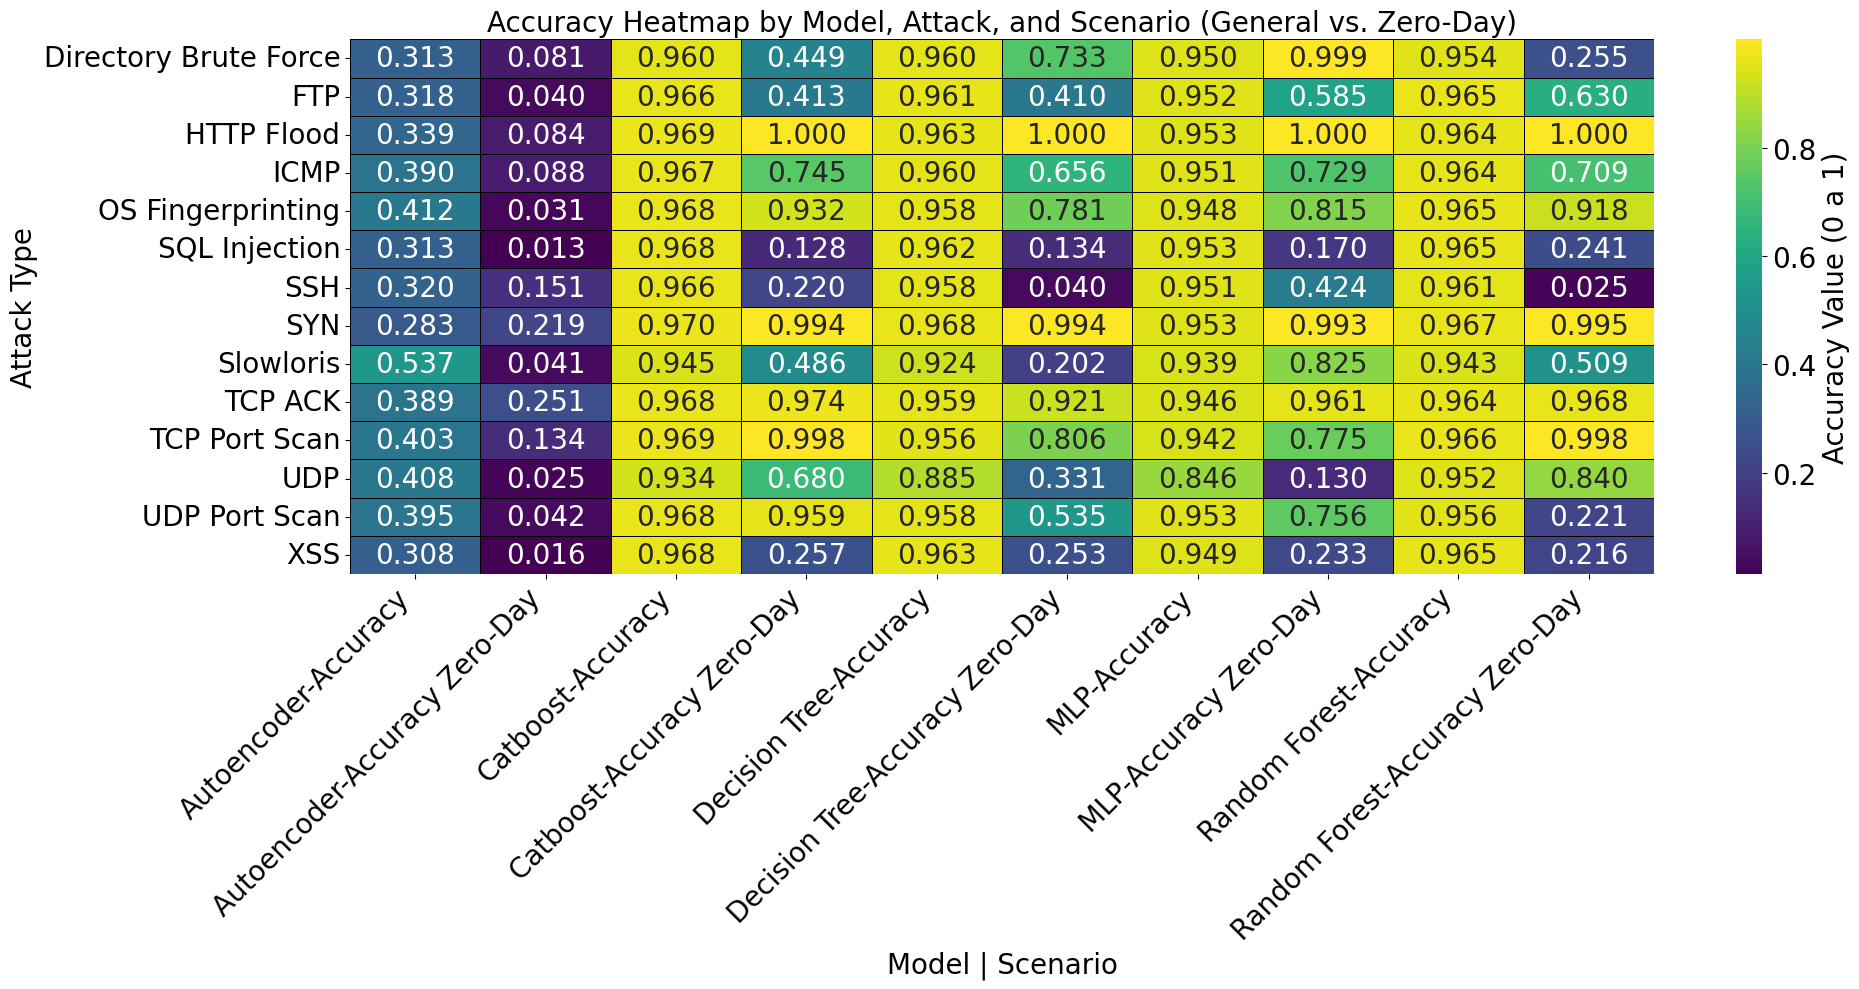

In [85]:
plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot,
    annot=True,
    fmt=".3f",
    cmap="viridis",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Accuracy Value (0 a 1)'},
    annot_kws={"fontsize": 20}
)

plt.title('Accuracy Heatmap by Model, Attack, and Scenario (General vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Accuracy Value (0 a 1)', fontsize=20)

cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

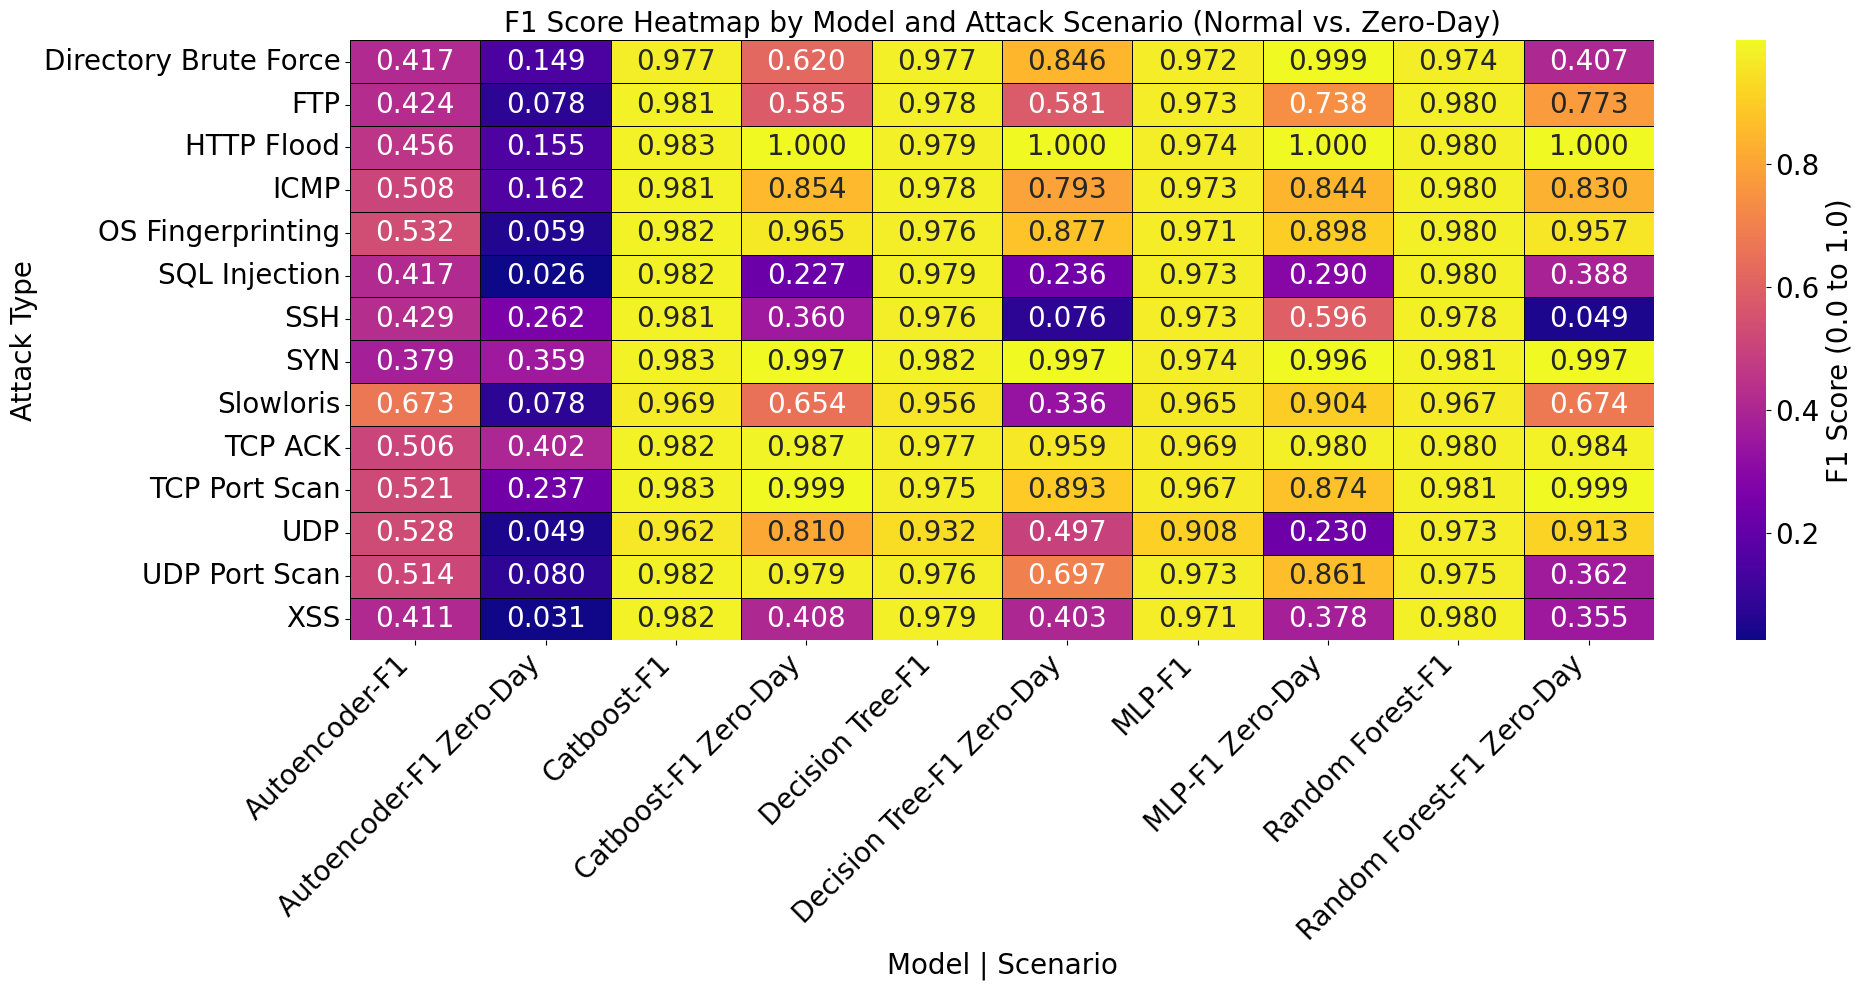

In [86]:
data_f1_heatmap = df[['Model', 'Ataque Zero-Day', 'F1', 'ZD - F1']].rename(columns={
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - F1': 'F1 Zero-Day', 'Modelo': 'Model'
})

df_melted_f1 = data_f1_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['F1', 'F1 Zero-Day'],
    var_name='Scenario',
    value_name='F1 Score'
)

df_pivot_f1 = df_melted_f1.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='F1 Score'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_f1,
    annot=True,
    fmt=".3f",
    cmap="plasma",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'F1 Score (0.0 to 1.0)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('F1 Score (0.0 to 1.0)', fontsize=20)

cbar.ax.tick_params(labelsize=20)

plt.title('F1 Score Heatmap by Model and Attack Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

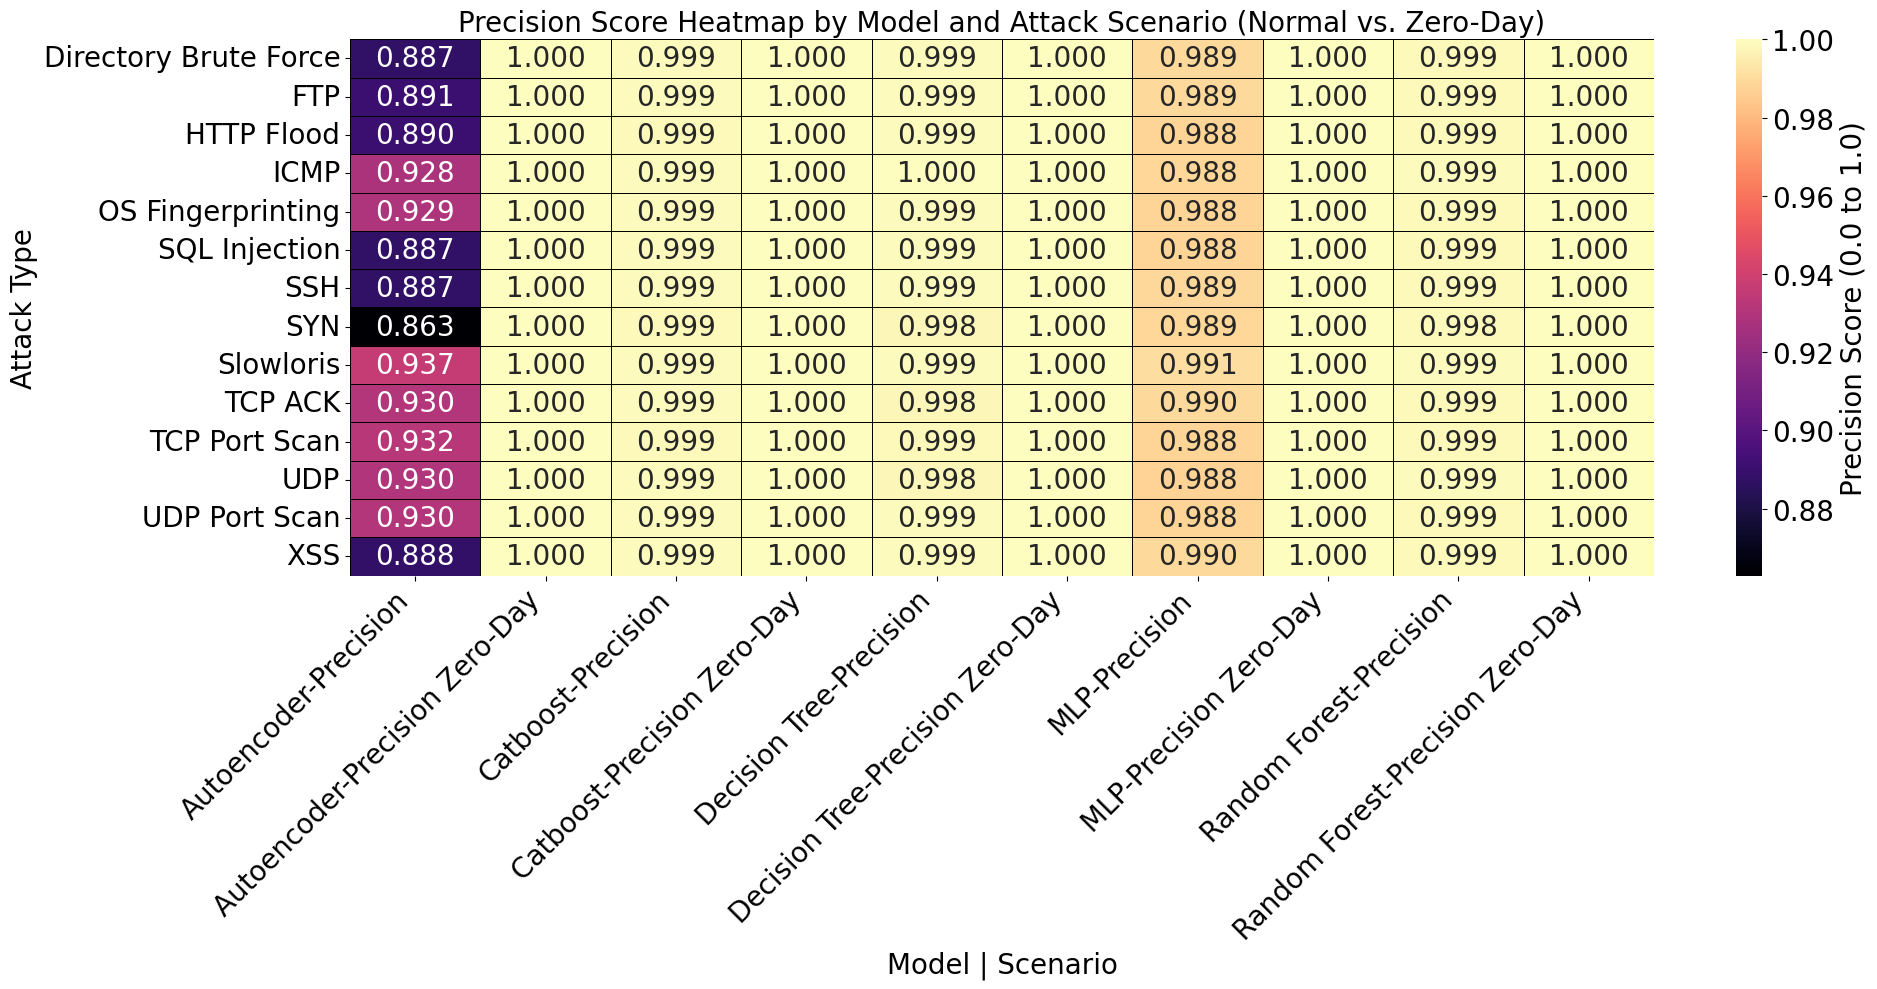

In [87]:
data_precision_heatmap = df[['Model', 'Ataque Zero-Day', 'Precision', 'ZD - Precision']].rename(columns={
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Precision': 'Precision Zero-Day','Modelo': 'Model'
})

df_melted_precision = data_precision_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Precision', 'Precision Zero-Day'],
    var_name='Scenario',
    value_name='Precision Score'
)

df_pivot_precision = df_melted_precision.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Precision Score'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_precision,
    annot=True,
    fmt=".3f",
    cmap="magma",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Precision Score (0.0 to 1.0)'},
    annot_kws={"fontsize": 20}
)


plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Precision Score (0.0 to 1.0)', fontsize=20)

cbar.ax.tick_params(labelsize=20)


plt.title('Precision Score Heatmap by Model and Attack Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

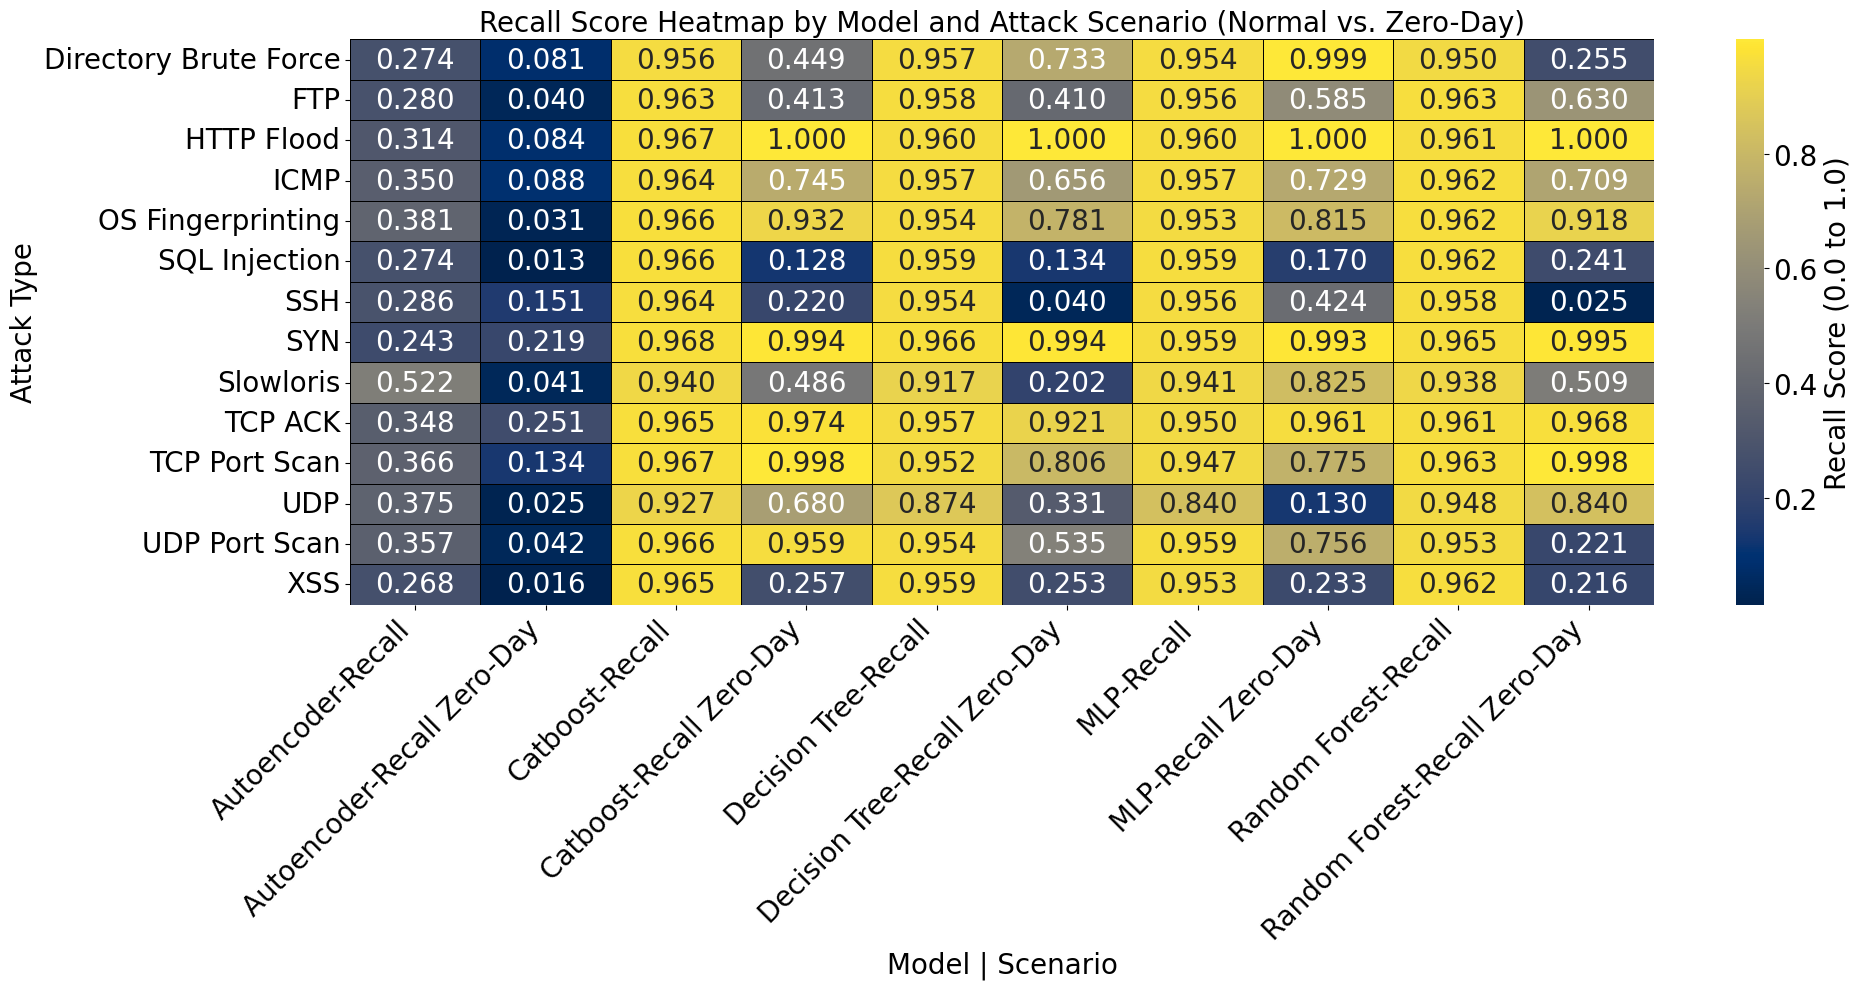

In [105]:
data_recall_heatmap = df[['Model', 'Ataque Zero-Day', 'Recall', 'ZD - Recall']].rename(columns={
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Recall': 'Recall Zero-Day','Modelo': 'Model'
})

df_melted_recall = data_recall_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Recall', 'Recall Zero-Day'],
    var_name='Scenario',
    value_name='Recall Score'
)

df_pivot_recall = df_melted_recall.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Recall Score'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_recall,
    annot=True,
    fmt=".3f",
    cmap="cividis",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Recall Score (0.0 to 1.0)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Recall Score (0.0 to 1.0)', fontsize=20)

cbar.ax.tick_params(labelsize=20)

plt.title('Recall Score Heatmap by Model and Attack Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# CPU

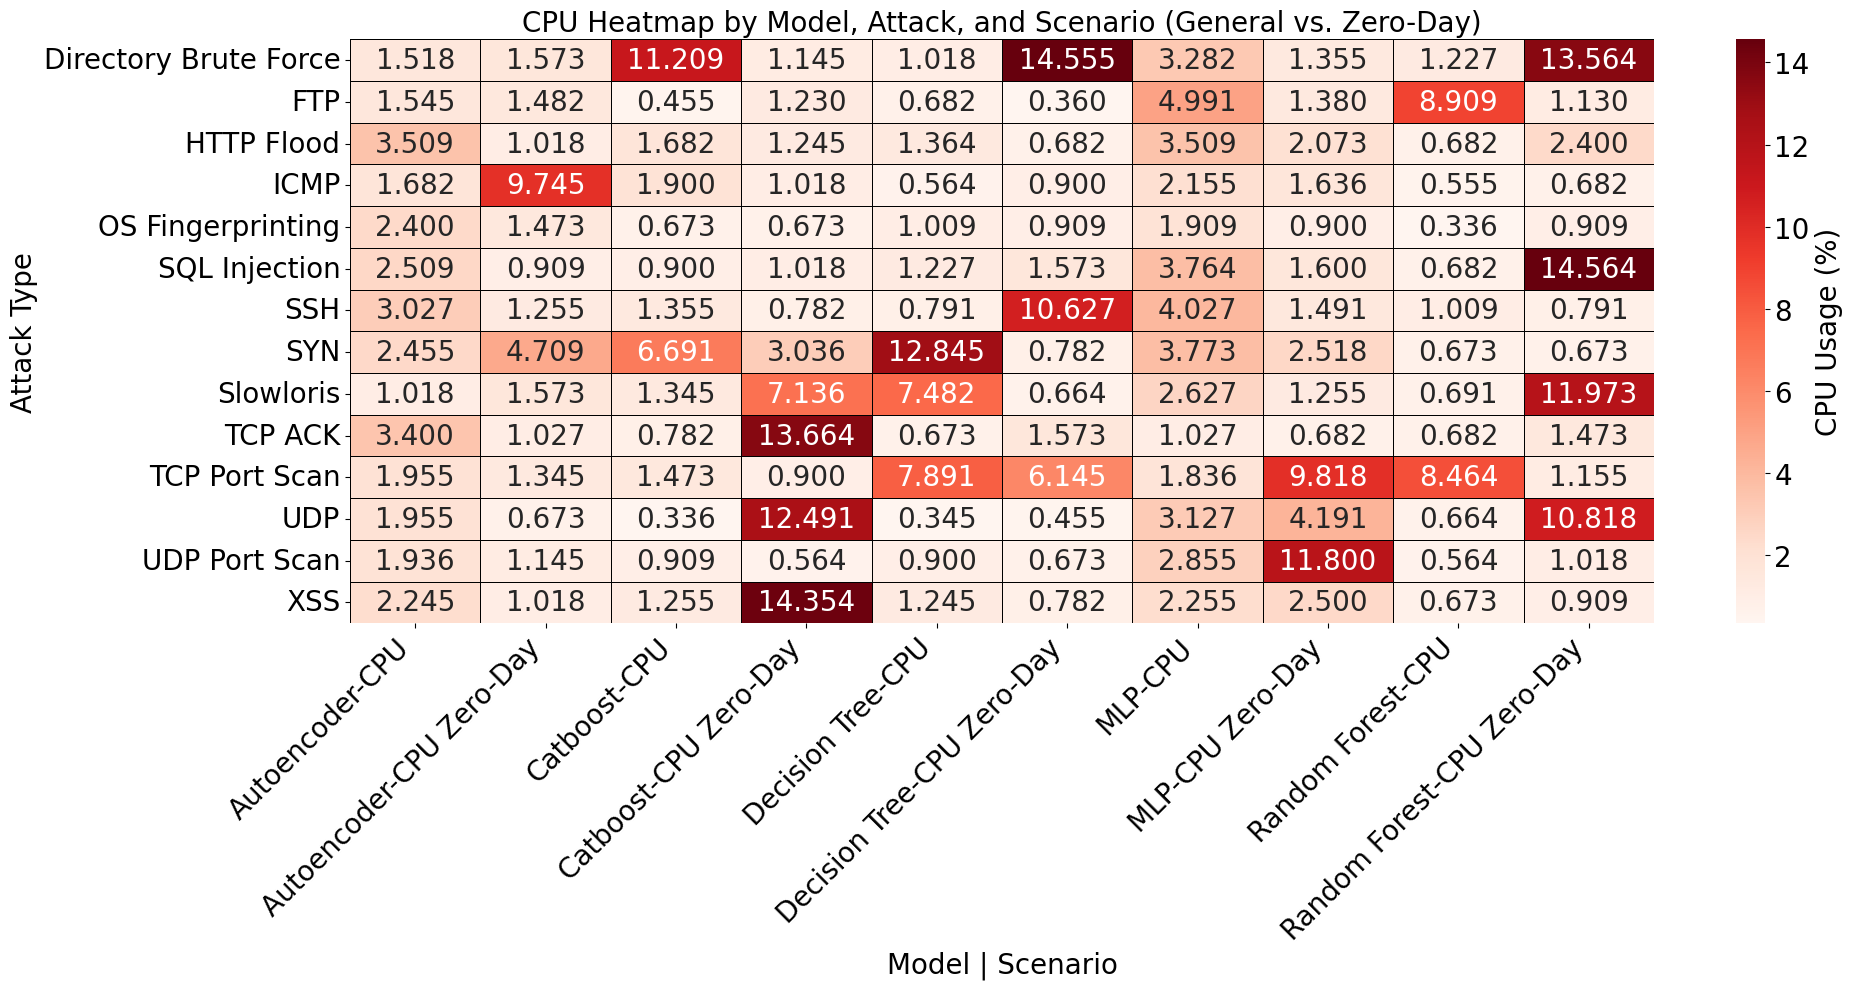

In [89]:
data_cpu_heatmap = df[['Model', 'Ataque Zero-Day', 'CPU', 'ZD - CPU']]
data_cpu_heatmap = data_cpu_heatmap.rename(columns={'ZD - CPU': 'CPU Zero-Day', 'Modelo': 'Model', 'Ataque Zero-Day': 'Attack Zero-Day'})

df_melted_cpu = data_cpu_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['CPU', 'CPU Zero-Day'],
    var_name='Scenario',
    value_name='Uso de CPU'
)

df_pivot_cpu = df_melted_cpu.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Uso de CPU'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_cpu,
    annot=True,
    fmt=".3f",
    cmap="Reds",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'CPU Usage (%)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('CPU Usage (%)', fontsize=20)

cbar.ax.tick_params(labelsize=20)


plt.title('CPU Heatmap by Model, Attack, and Scenario (General vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Memory

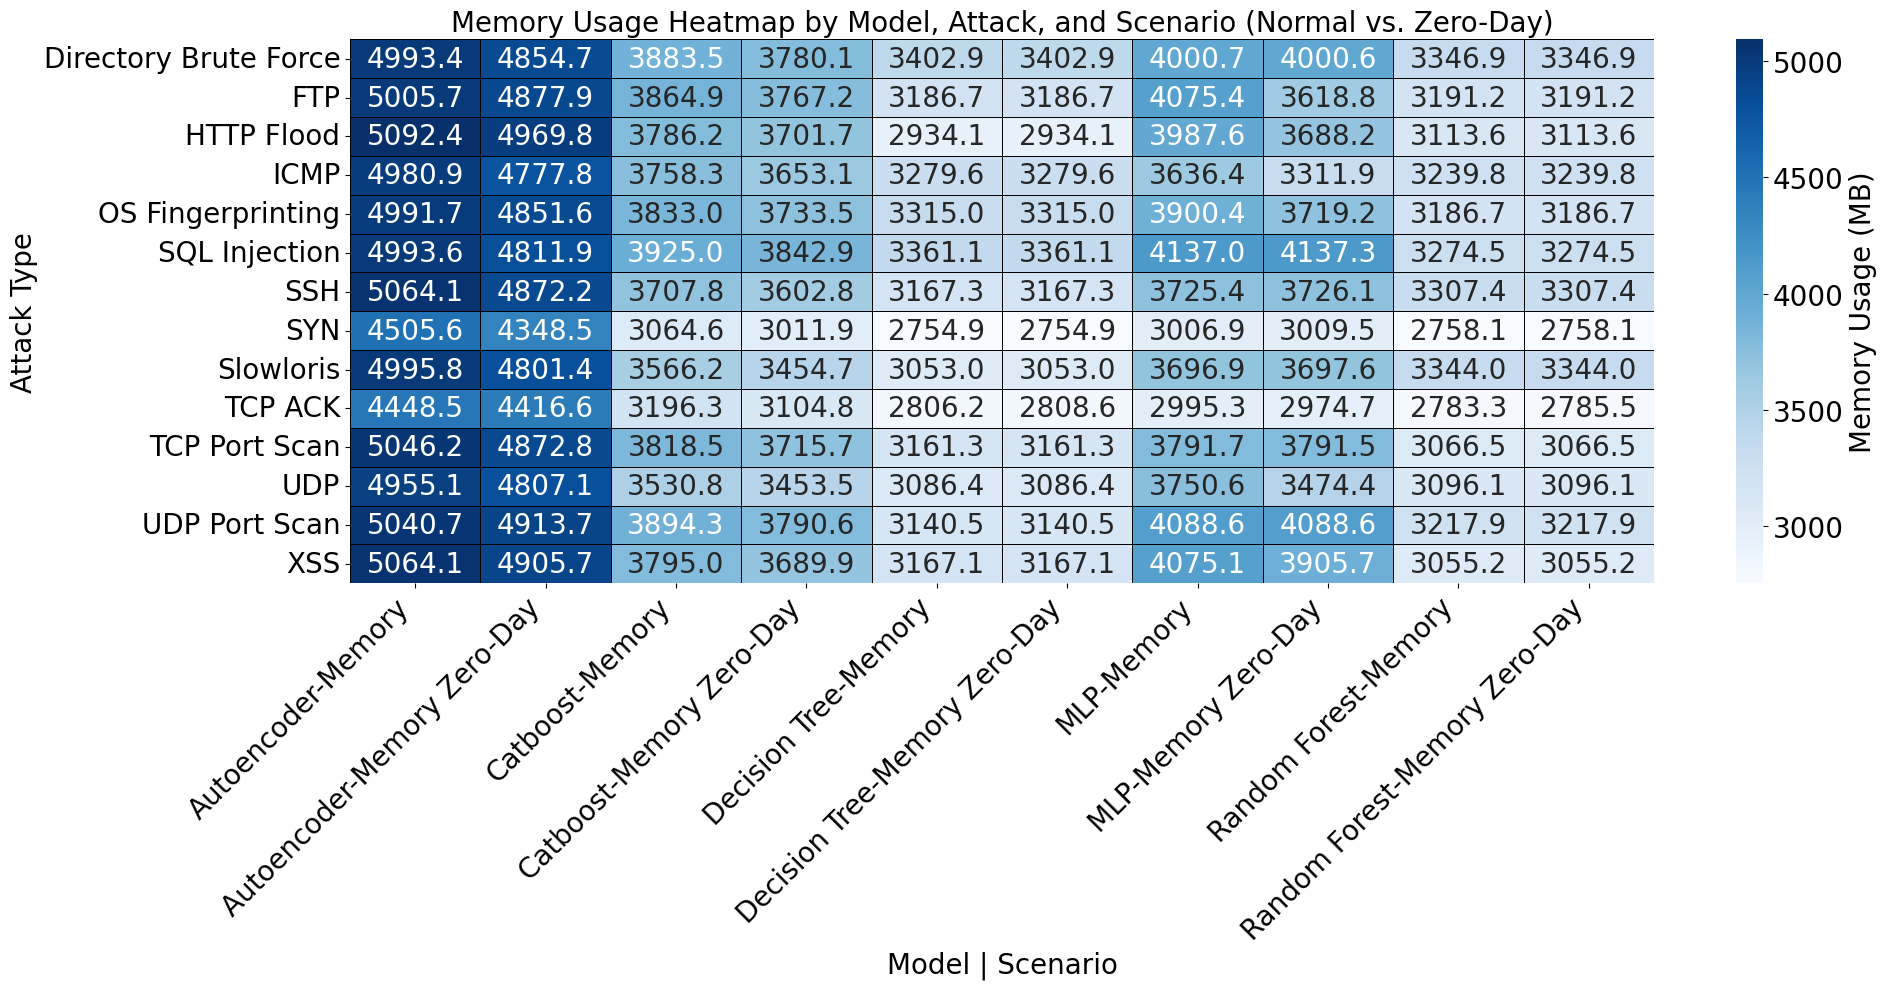

In [90]:
data_memory_heatmap = df[['Model', 'Ataque Zero-Day', 'Memory', 'ZD - Memory']]

data_memory_heatmap = data_memory_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Memory': 'Memory Zero-Day'
})

df_melted_memory = data_memory_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Memory', 'Memory Zero-Day'],
    var_name='Scenario',
    value_name='Memory Usage (MB)'
)

df_pivot_memory = df_melted_memory.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Memory Usage (MB)'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_memory,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Memory Usage (MB)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Memory Usage (MB)', fontsize=20)

cbar.ax.tick_params(labelsize=20)

plt.title('Memory Usage Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Energy

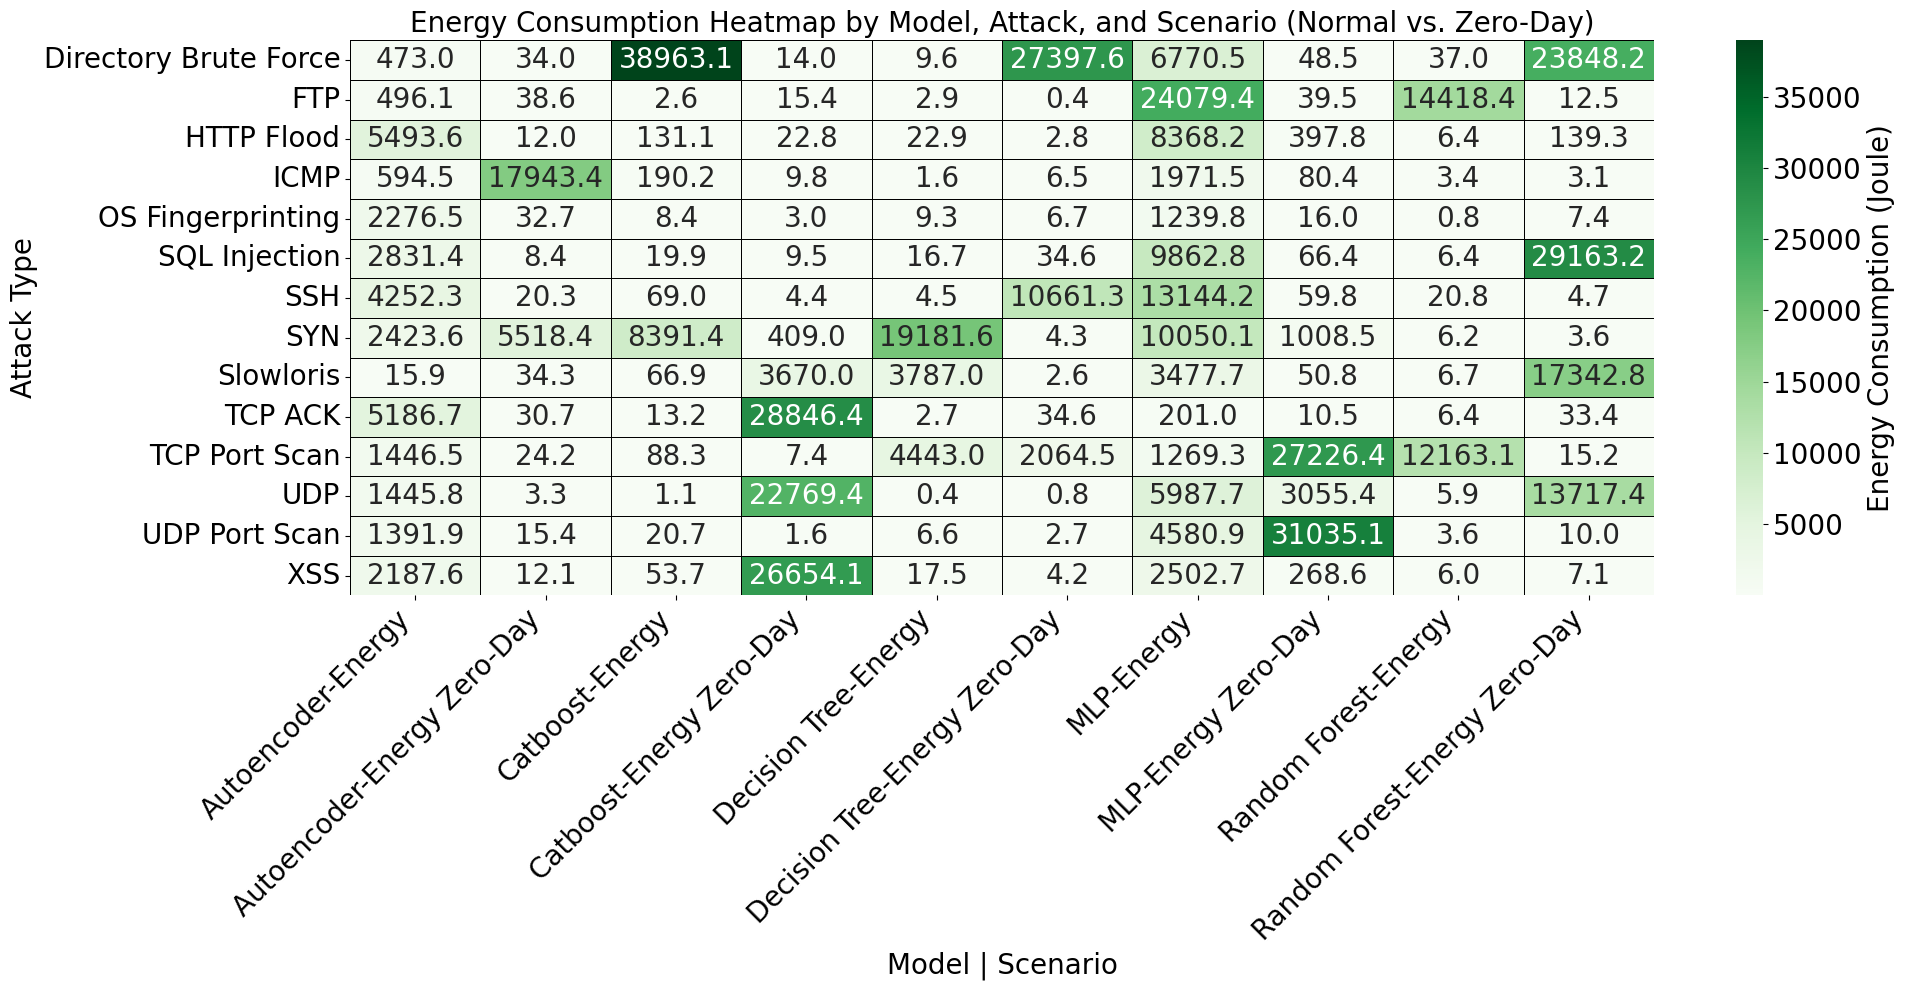

In [91]:
data_energy_heatmap = df[['Model', 'Ataque Zero-Day', 'Energy', 'ZD - Energy']]

data_energy_heatmap = data_energy_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Energy': 'Energy Zero-Day'
})

df_melted_energy = data_energy_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Energy', 'Energy Zero-Day'],
    var_name='Scenario',
    value_name='Energy Consumption'
)

df_pivot_energy = df_melted_energy.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Energy Consumption'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_energy,
    annot=True,
    fmt=".1f",
    cmap="Greens",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Energy Consumption (Joule)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Energy Consumption (Joule)', fontsize=20)

cbar.ax.tick_params(labelsize=20)

plt.title('Energy Consumption Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Time


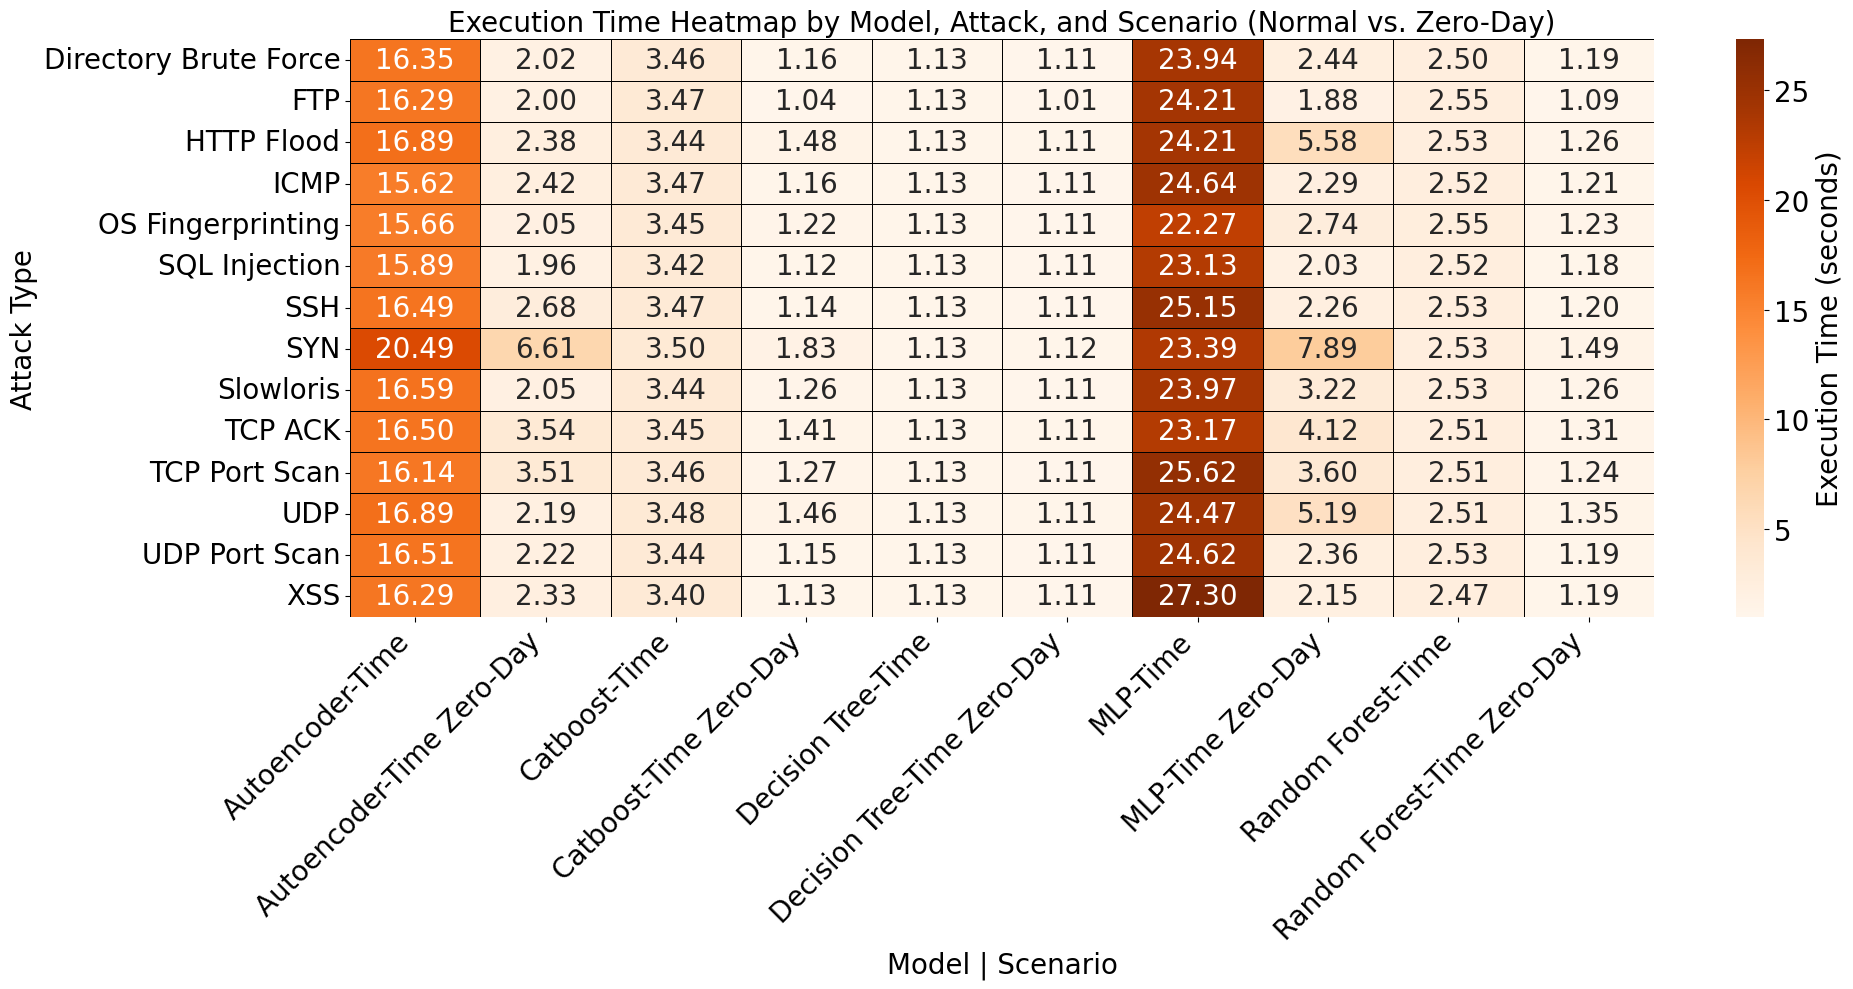

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_time_heatmap = df[['Model', 'Ataque Zero-Day', 'Time', 'ZD - Time']]

data_time_heatmap = data_time_heatmap.rename(columns={
    'Modelo': 'Model',
    'Ataque Zero-Day': 'Attack Zero-Day',
    'ZD - Time': 'Time Zero-Day'
})

df_melted_time = data_time_heatmap.melt(
    id_vars=['Model', 'Attack Zero-Day'],
    value_vars=['Time', 'Time Zero-Day'],
    var_name='Scenario',
    value_name='Execution Time (s)'
)

df_pivot_time = df_melted_time.pivot_table(
    index='Attack Zero-Day',
    columns=['Model', 'Scenario'],
    values='Execution Time (s)'
)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df_pivot_time,
    annot=True,
    fmt=".2f",
    cmap="Oranges",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Execution Time (seconds)'},
    annot_kws={"fontsize": 20}
)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

cbar = ax.collections[0].colorbar
cbar.set_label('Execution Time (seconds)', fontsize=20)

cbar.ax.tick_params(labelsize=20)
plt.title('Execution Time Heatmap by Model, Attack, and Scenario (Normal vs. Zero-Day)', fontsize=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Barplot

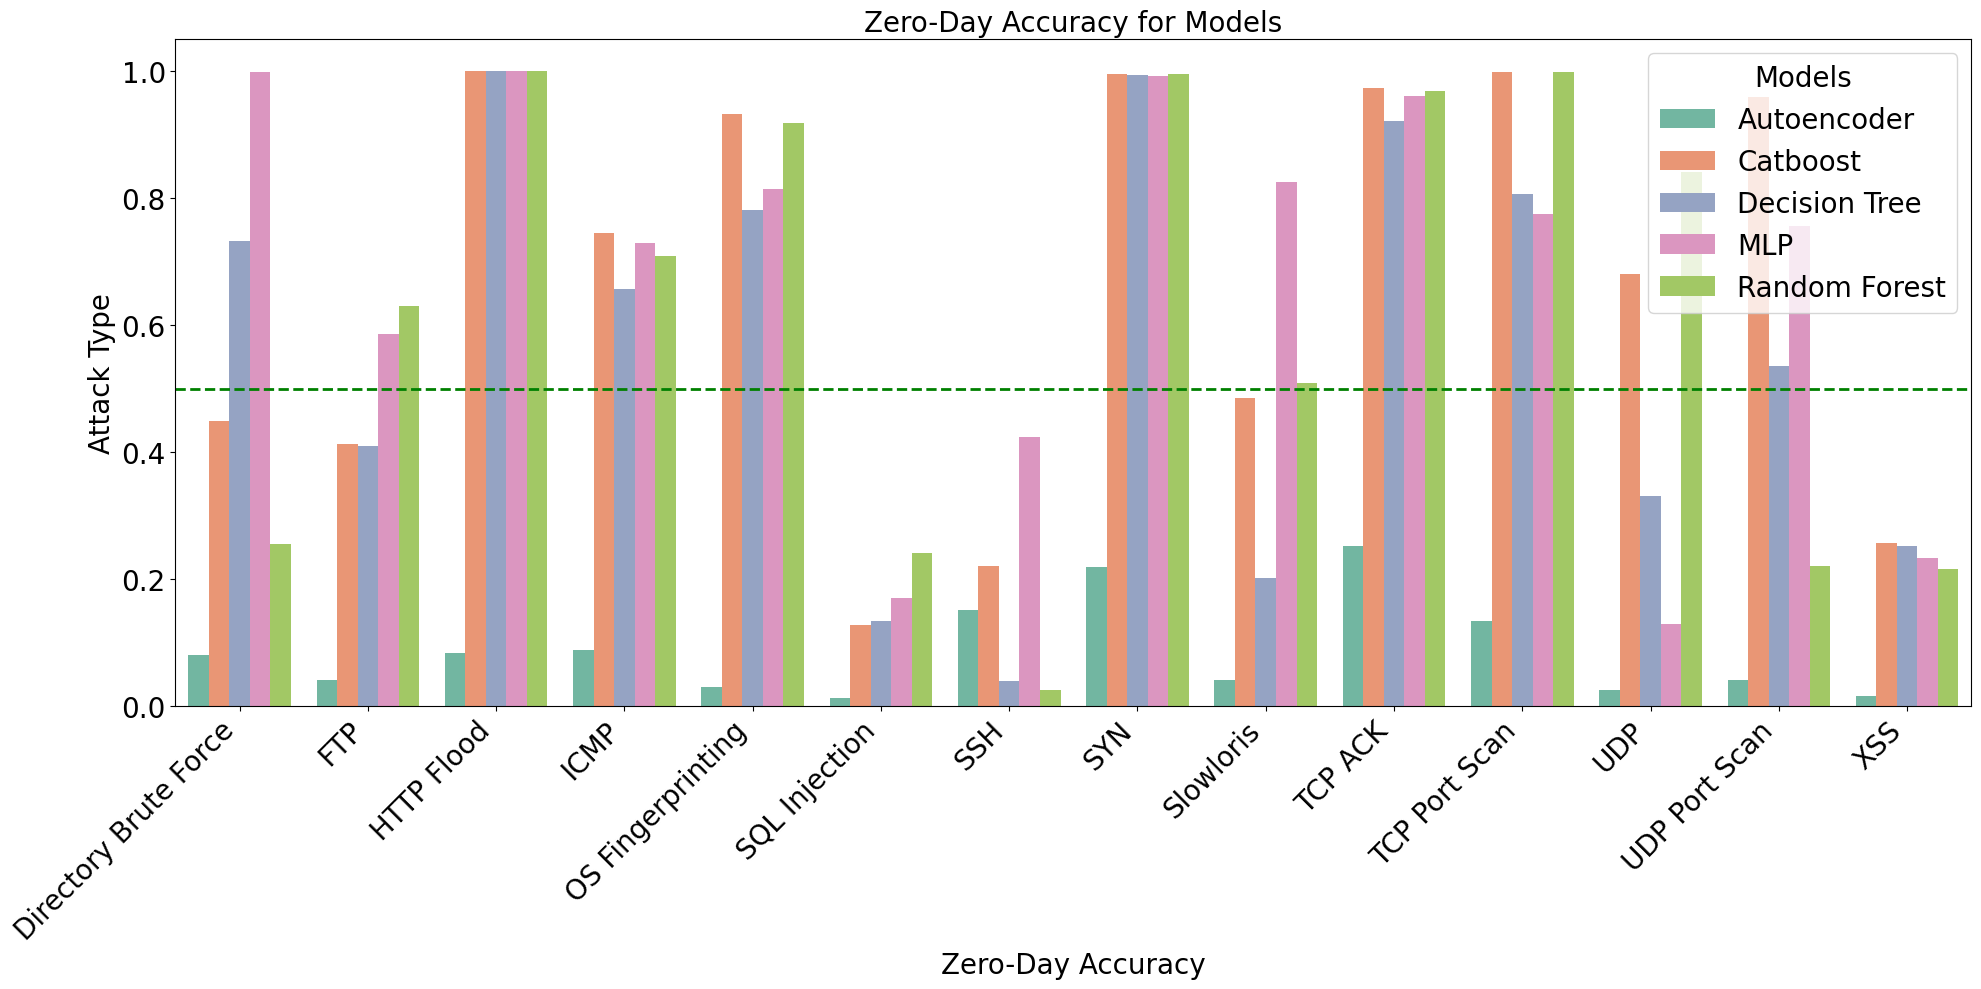

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_accuracy_zd = df[['Model', 'Ataque Zero-Day', 'ZD - Accuracy']]

df_plot = df_accuracy_zd.groupby(['Ataque Zero-Day', 'Model'])['ZD - Accuracy'].mean().reset_index()

plt.figure(figsize=(20, 10))

sns.barplot(
    x='Ataque Zero-Day',
    y='ZD - Accuracy',
    hue='Model',
    data=df_plot,
    palette='Set2'
)

plt.title('Zero-Day Accuracy for Models', fontsize=20)
plt.xlabel('Zero-Day Accuracy', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.axhline(y=0.5, color='green', linestyle='--', linewidth=2)

plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.legend(
    title='Models',
    loc='upper right',
    fontsize=20,
    title_fontsize=20
)

plt.tight_layout()
plt.show()

# Training vs Test

In [97]:
df_train_string = """Model,attack,total_time_train,avg_cpu_train,avg_mem_train,energy_train
Decision Tree,tcp_ack,13.7231,50,2781.27,1.37231e+07
Decision Tree,syn,10.2282,50,2754.91,1.02282e+07
Decision Tree,icmp,15.2975,50,3279.59,1.52975e+07
Decision Tree,slowloris,13.1991,50,3053.04,1.31991e+07
Decision Tree,udp,12.8279,49.95,3086.38,1.27895e+07
Decision Tree,ssh,14.7542,50,3167.33,1.47542e+07
Decision Tree,ftp,15.3055,50,3186.65,1.53055e+07
Decision Tree,portscan_tcp,14.1607,50.05,3161.33,1.42032e+07
Decision Tree,os_fingerprinting,15.5043,50,3315.04,1.55043e+07
Decision Tree,portscan_udp,15.0794,50,3140.54,1.50794e+07
Decision Tree,http_flood,11.8304,49.95,2934.11,1.17949e+07
Decision Tree,dir_bruteforce,15.133,49.95,3402.87,1.50877e+07
Decision Tree,xss,15.5638,50,3167.11,1.55638e+07
Decision Tree,sql_injection,15.238,50,3361.09,1.5238e+07
Random Forest,tcp_ack,291.404,49.95,2769.59,2.90531e+08
Random Forest,syn,224.521,50,2732.53,2.24521e+08
Random Forest,icmp,339.026,49.95,3239.79,3.3801e+08
Random Forest,slowloris,308.934,49.95,3343.96,3.08008e+08
Random Forest,udp,290.712,49.95,3096.04,2.89841e+08
Random Forest,ssh,338.242,49.95,3307.38,3.37229e+08
Random Forest,ftp,339.552,49.95,3191.14,3.38535e+08
Random Forest,portscan_tcp,326.175,49.95,3066.48,3.25198e+08
Random Forest,os_fingerprinting,330.523,49.95,3186.58,3.29532e+08
Random Forest,portscan_udp,343.965,49.95,3217.85,3.42934e+08
Random Forest,http_flood,277.388,49.95,3113.52,2.76557e+08
Random Forest,dir_bruteforce,333.385,49.95,3346.79,3.32386e+08
Random Forest,xss,336.578,49.95,3048.85,3.35569e+08
Random Forest,sql_injection,339.173,49.95,3255.53,3.38156e+08
Catboost,tcp_ack,70.7107,366.1,3002.84,2.77571e+10
Catboost,syn,61.5071,356.25,3065.73,2.22474e+10
Catboost,icmp,80.8817,364.55,3670.54,3.13481e+10
Catboost,slowloris,77.4488,366.9,3508.81,3.06019e+10
Catboost,udp,70.7313,367.5,3518.36,2.80849e+10
Catboost,ssh,82.3127,364.75,3649.29,3.19553e+10
Catboost,ftp,81.8787,365,3838.58,3.18522e+10
Catboost,portscan_tcp,76.9334,365.8,3780.17,3.01256e+10
Catboost,os_fingerprinting,79.3102,365.5,3791.19,3.098e+10
Catboost,portscan_udp,82.5631,364.45,3840.49,3.19735e+10
Catboost,http_flood,69.0744,368.4,3762.99,2.7629e+10
Catboost,dir_bruteforce,80.8067,366.55,3833.99,3.18373e+10
Catboost,xss,82.275,365.2,3765.13,3.2059e+10
Catboost,sql_injection,82.1007,364.9,3888.83,3.19123e+10
MLP,tcp_ack,448.003,3.19167,3140.71,116526
MLP,syn,290.518,0.87,3112.99,1530.46
MLP,icmp,426.336,1.38,3586.03,8963.53
MLP,slowloris,835.082,2.095,3720.8,61428.7
MLP,udp,386.824,2.92,3737.28,77046.3
MLP,ssh,428.391,0.86,3938.52,2179.84
MLP,ftp,437.15,0.77,3970.53,1596.59
MLP,portscan_tcp,413.784,2.71,3932.21,65882.8
MLP,os_fingerprinting,436.214,6.16,4083.5,815703
MLP,portscan_udp,443.606,2,4117.1,28390.8
MLP,http_flood,369.28,2.24,4003.33,33203.9
MLP,dir_bruteforce,435.23,3.73,4154.45,180691
MLP,xss,464.034,8.64,4236.23,2.39432e+06
MLP,sql_injection,455.817,5.01,4351.4,458558
Autoencoder,tcp_ack,930.362,2.605,4091.56,131573
Autoencoder,syn,507.12,2.46,4403.08,60395.8
Autoencoder,icmp,207.748,4.63,4945.98,164956
Autoencoder,slowloris,182.923,8.78,5093.01,990473
Autoencoder,udp,155.58,6.8,5171.13,391354
Autoencoder,ssh,194.891,4.92,5473.37,185685
Autoencoder,ftp,198.47,7.91,5561.1,785804
Autoencoder,portscan_tcp,192.103,2.48,5667.47,23441.1
Autoencoder,os_fingerprinting,197.708,2.52,5868.82,25311.3
Autoencoder,portscan_udp,252.991,5.1,5866.81,268476
Autoencoder,http_flood,191.192,1.38,5792.72,4019.73
Autoencoder,dir_bruteforce,248.754,6.05,6093.84,440683
Autoencoder,xss,239.629,11.78,6238.27,3.13376e+06
Autoencoder,sql_injection,198.928,3.99,6321.02,101089
"""

In [98]:
# --- 1. Carregar os Dados ---
df_train = pd.read_csv(io.StringIO(df_train_string))
df_test = pd.read_csv(io.StringIO(df_test))

## CPU

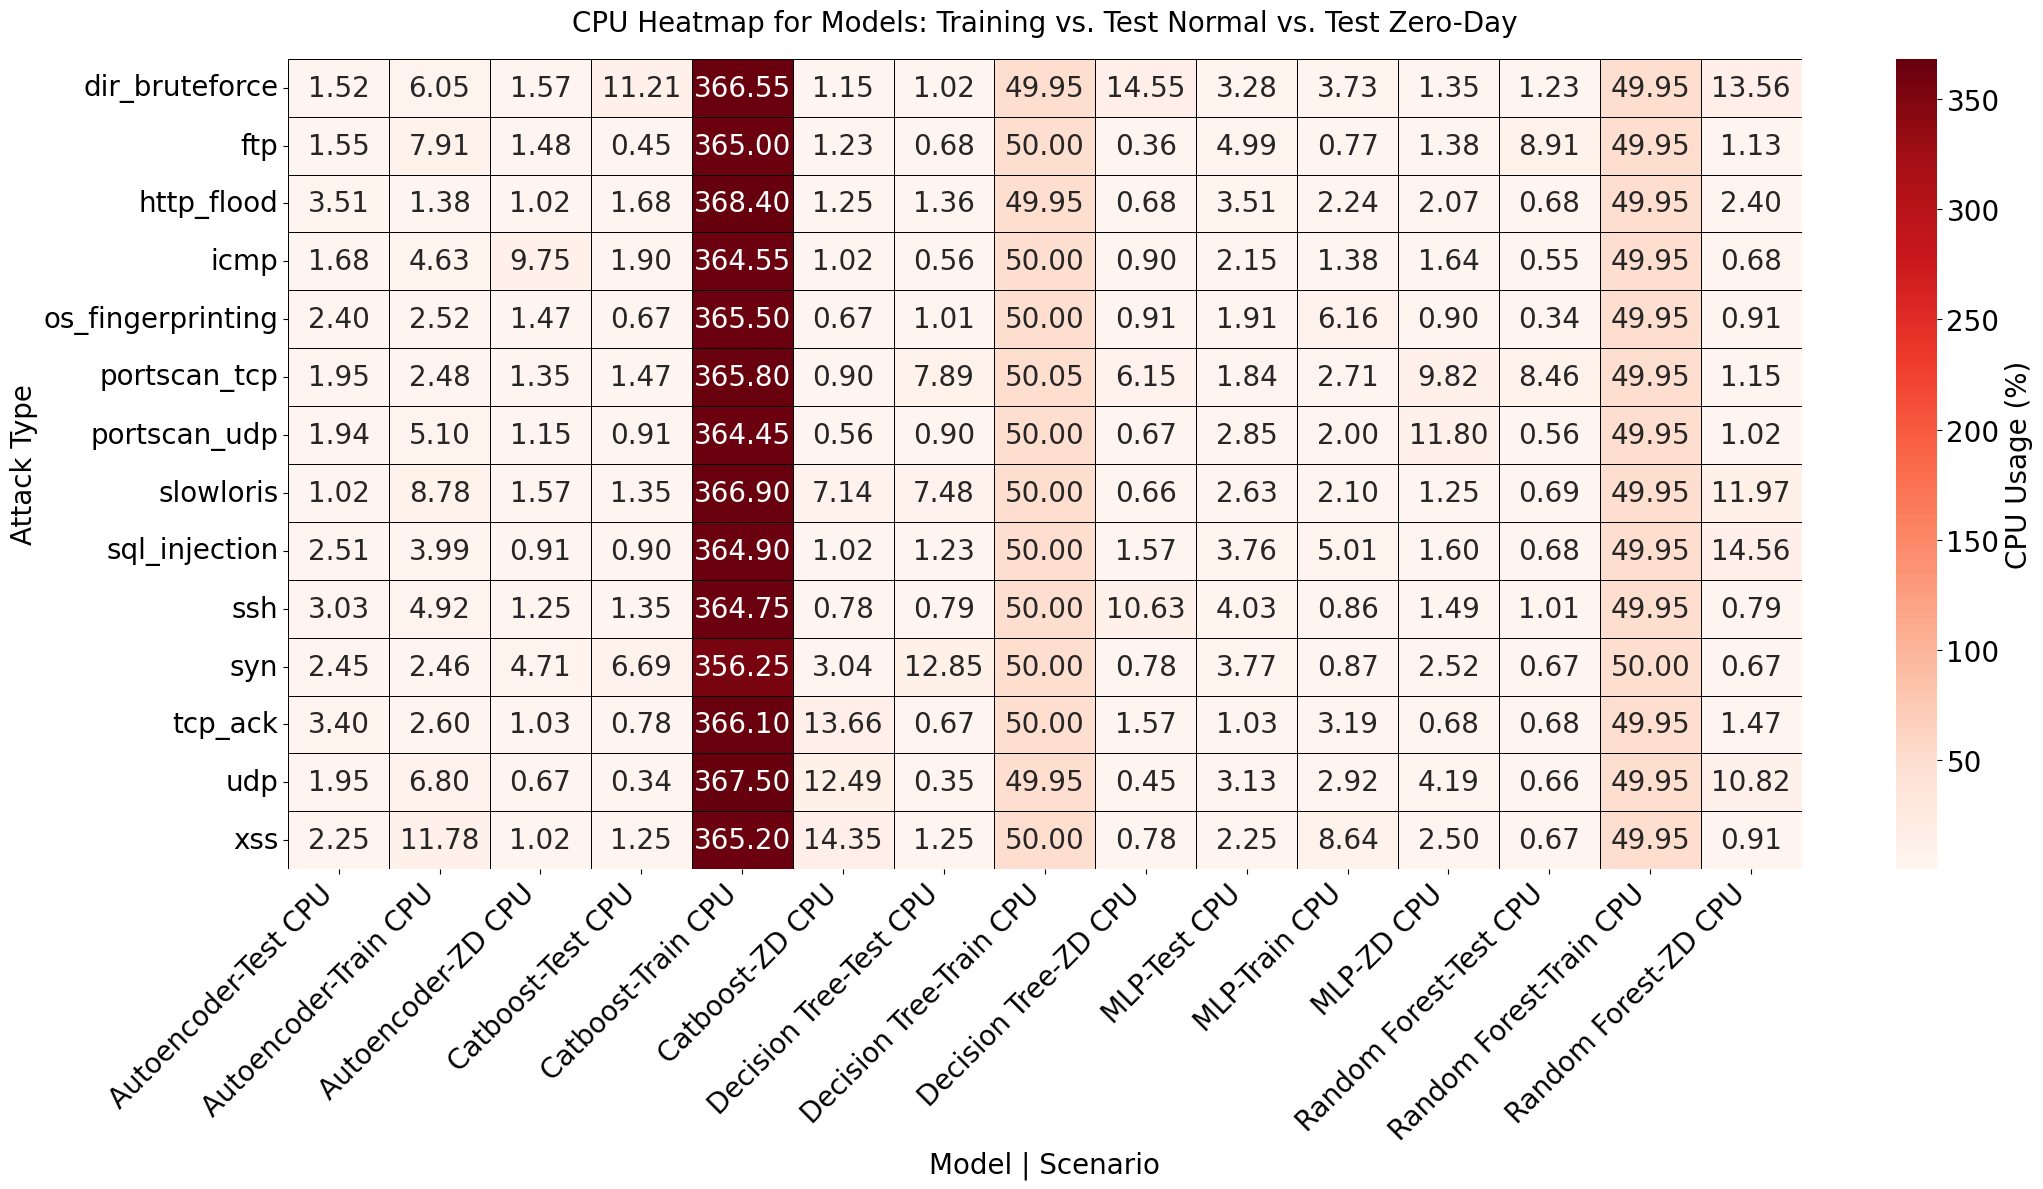

In [99]:
# --- 2. Preparação dos Dados ---
# Selecionar e renomear colunas do DataFrame de Treinamento
df_cpu_train = df_train[['Model', 'attack', 'avg_cpu_train']].rename(
    columns={'attack': 'Attack', 'avg_cpu_train': 'Train CPU'}
)

# Selecionar e renomear colunas do DataFrame de Teste
df_cpu_test = df_test[['Model', 'Ataque Zero-Day', 'CPU', 'ZD - CPU']].rename(
    columns={'Ataque Zero-Day': 'Attack', 'CPU': 'Test CPU', 'ZD - CPU': 'ZD CPU'}
)

# Mesclar os DataFrames
df_cpu_combined = pd.merge(df_cpu_train, df_cpu_test, on=['Model', 'Attack'])

# Derreter (Melt) o DataFrame para ter o formato longo
df_melted_cpu = df_cpu_combined.melt(
    id_vars=['Model', 'Attack'],
    value_vars=['Train CPU', 'Test CPU', 'ZD CPU'],
    var_name='Scenario',
    value_name='CPU Usage (%)'
)

# Pivotar para o formato do Heatmap (Attack vs. Model | Scenario)
df_pivot_cpu = df_melted_cpu.pivot_table(
    index='Attack',
    columns=['Model', 'Scenario'],
    values='CPU Usage (%)',
    aggfunc='mean'
)

# --- 3. Geração do Heatmap ---
plt.figure(figsize=(22, 12)) # Aumentei o tamanho para acomodar 15 colunas

ax = sns.heatmap(
    df_pivot_cpu,
    annot=True,
    fmt=".2f", # Formato de duas casas decimais
    cmap="Reds", # Paleta de cores quente (amarelo-laranja-vermelho) para CPU
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'CPU Usage (%)'},
    annot_kws={"fontsize": 20}
)

# Estilização
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Ajuste do Label da Barra de Cor
cbar = ax.collections[0].colorbar
cbar.set_label('CPU Usage (%)', fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Títulos e Labels
plt.title('CPU Heatmap for Models: Training vs. Test Normal vs. Test Zero-Day', fontsize=20, pad=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)


plt.tight_layout()
plt.show()

## Memory

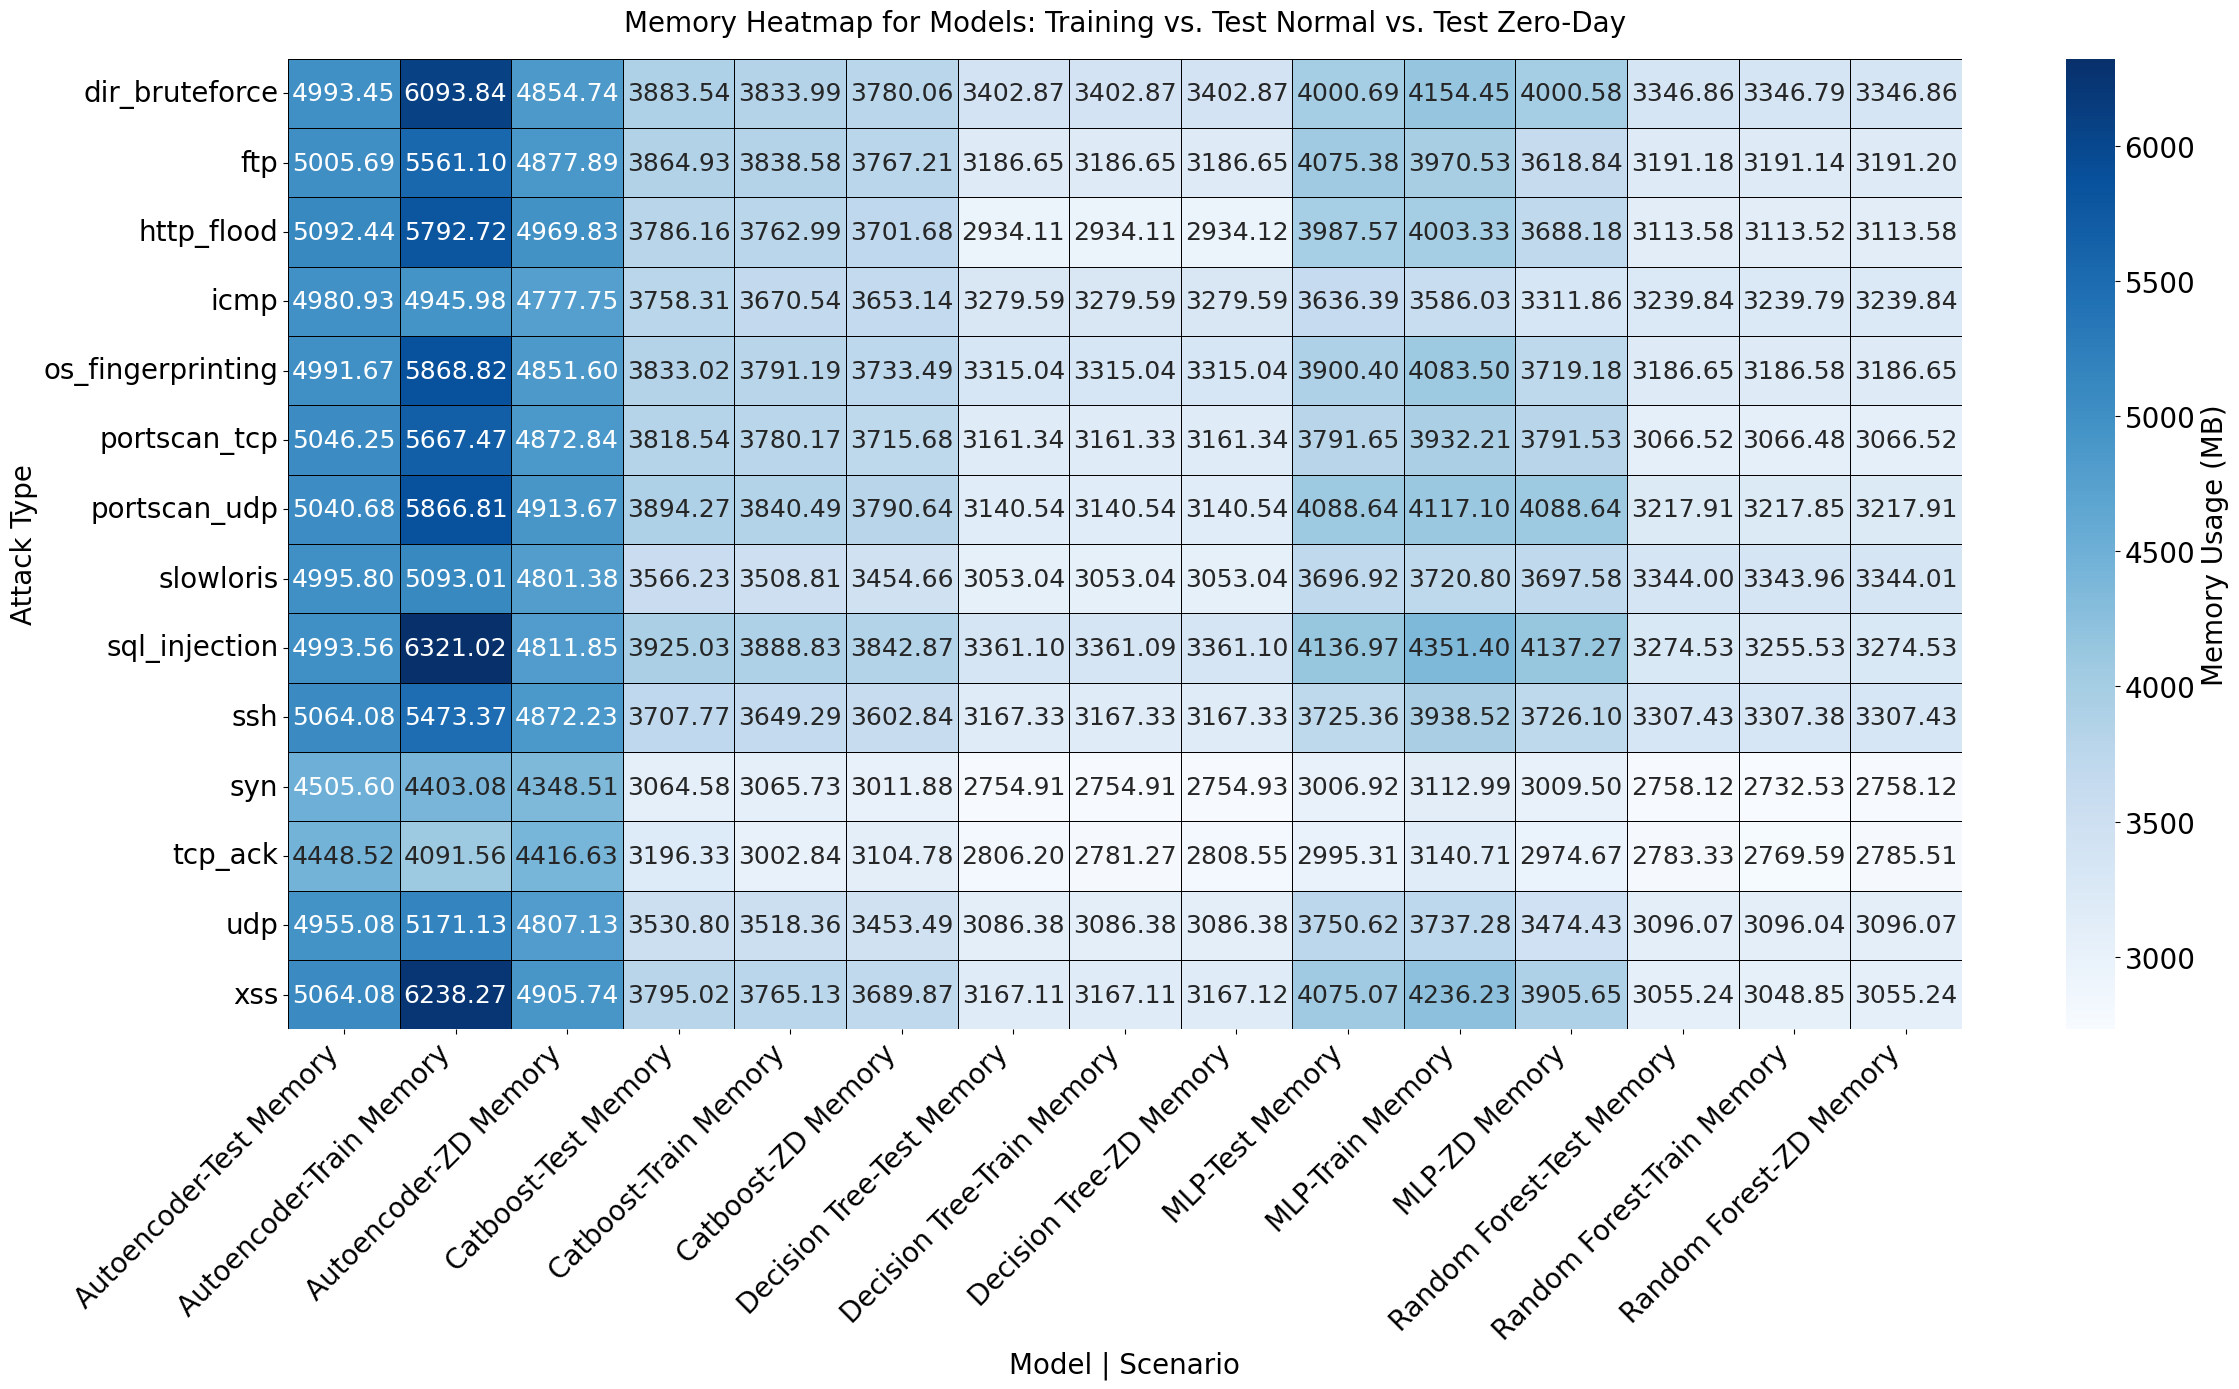

In [100]:
df_mem_train = df_train[['Model', 'attack', 'avg_mem_train']].rename(
    columns={'attack': 'Attack', 'avg_mem_train': 'Train Memory'}
)

# Selecionar e renomear colunas do DataFrame de Teste (Memória)
df_mem_test = df_test[['Model', 'Ataque Zero-Day', 'Memory', 'ZD - Memory']].rename(
    columns={'Ataque Zero-Day': 'Attack', 'Memory': 'Test Memory', 'ZD - Memory': 'ZD Memory'}
)

# Mesclar os DataFrames de Memória
df_mem_combined = pd.merge(df_mem_train, df_mem_test, on=['Model', 'Attack'])

# Derreter (Melt) o DataFrame para ter o formato longo
df_melted_mem = df_mem_combined.melt(
    id_vars=['Model', 'Attack'],
    value_vars=['Train Memory', 'Test Memory', 'ZD Memory'],
    var_name='Scenario',
    value_name='Memory Usage (MB)' # Unidade de Memória (MegaBytes)
)

# Pivotar para o formato do Heatmap (Attack vs. Model | Scenario)
df_pivot_mem = df_melted_mem.pivot_table(
    index='Attack',
    columns=['Model', 'Scenario'],
    values='Memory Usage (MB)',
    aggfunc='mean'
)

# --- 3. Geração do Heatmap de Memória ---
# Adaptando as configurações de plotagem para Memória
plt.figure(figsize=(24, 14))

# Paleta de cores para Memória (usei GnBu, Verde-Azul, para contraste com CPU)
ax = sns.heatmap(
    df_pivot_mem,
    annot=True,
    fmt=".2f",
    cmap="Blues", # Paleta de cores para Memória
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Memory Usage (MB)'},
    annot_kws={"fontsize": 18}
)

# Estilização
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Ajuste do Label da Barra de Cor
cbar = ax.collections[0].colorbar
cbar.set_label('Memory Usage (MB)', fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Adaptação do Título para Memória (conforme solicitado)
plt.title('Memory Heatmap for Models: Training vs. Test Normal vs. Test Zero-Day', fontsize=20, pad=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.tight_layout()
plt.show()

## Energy

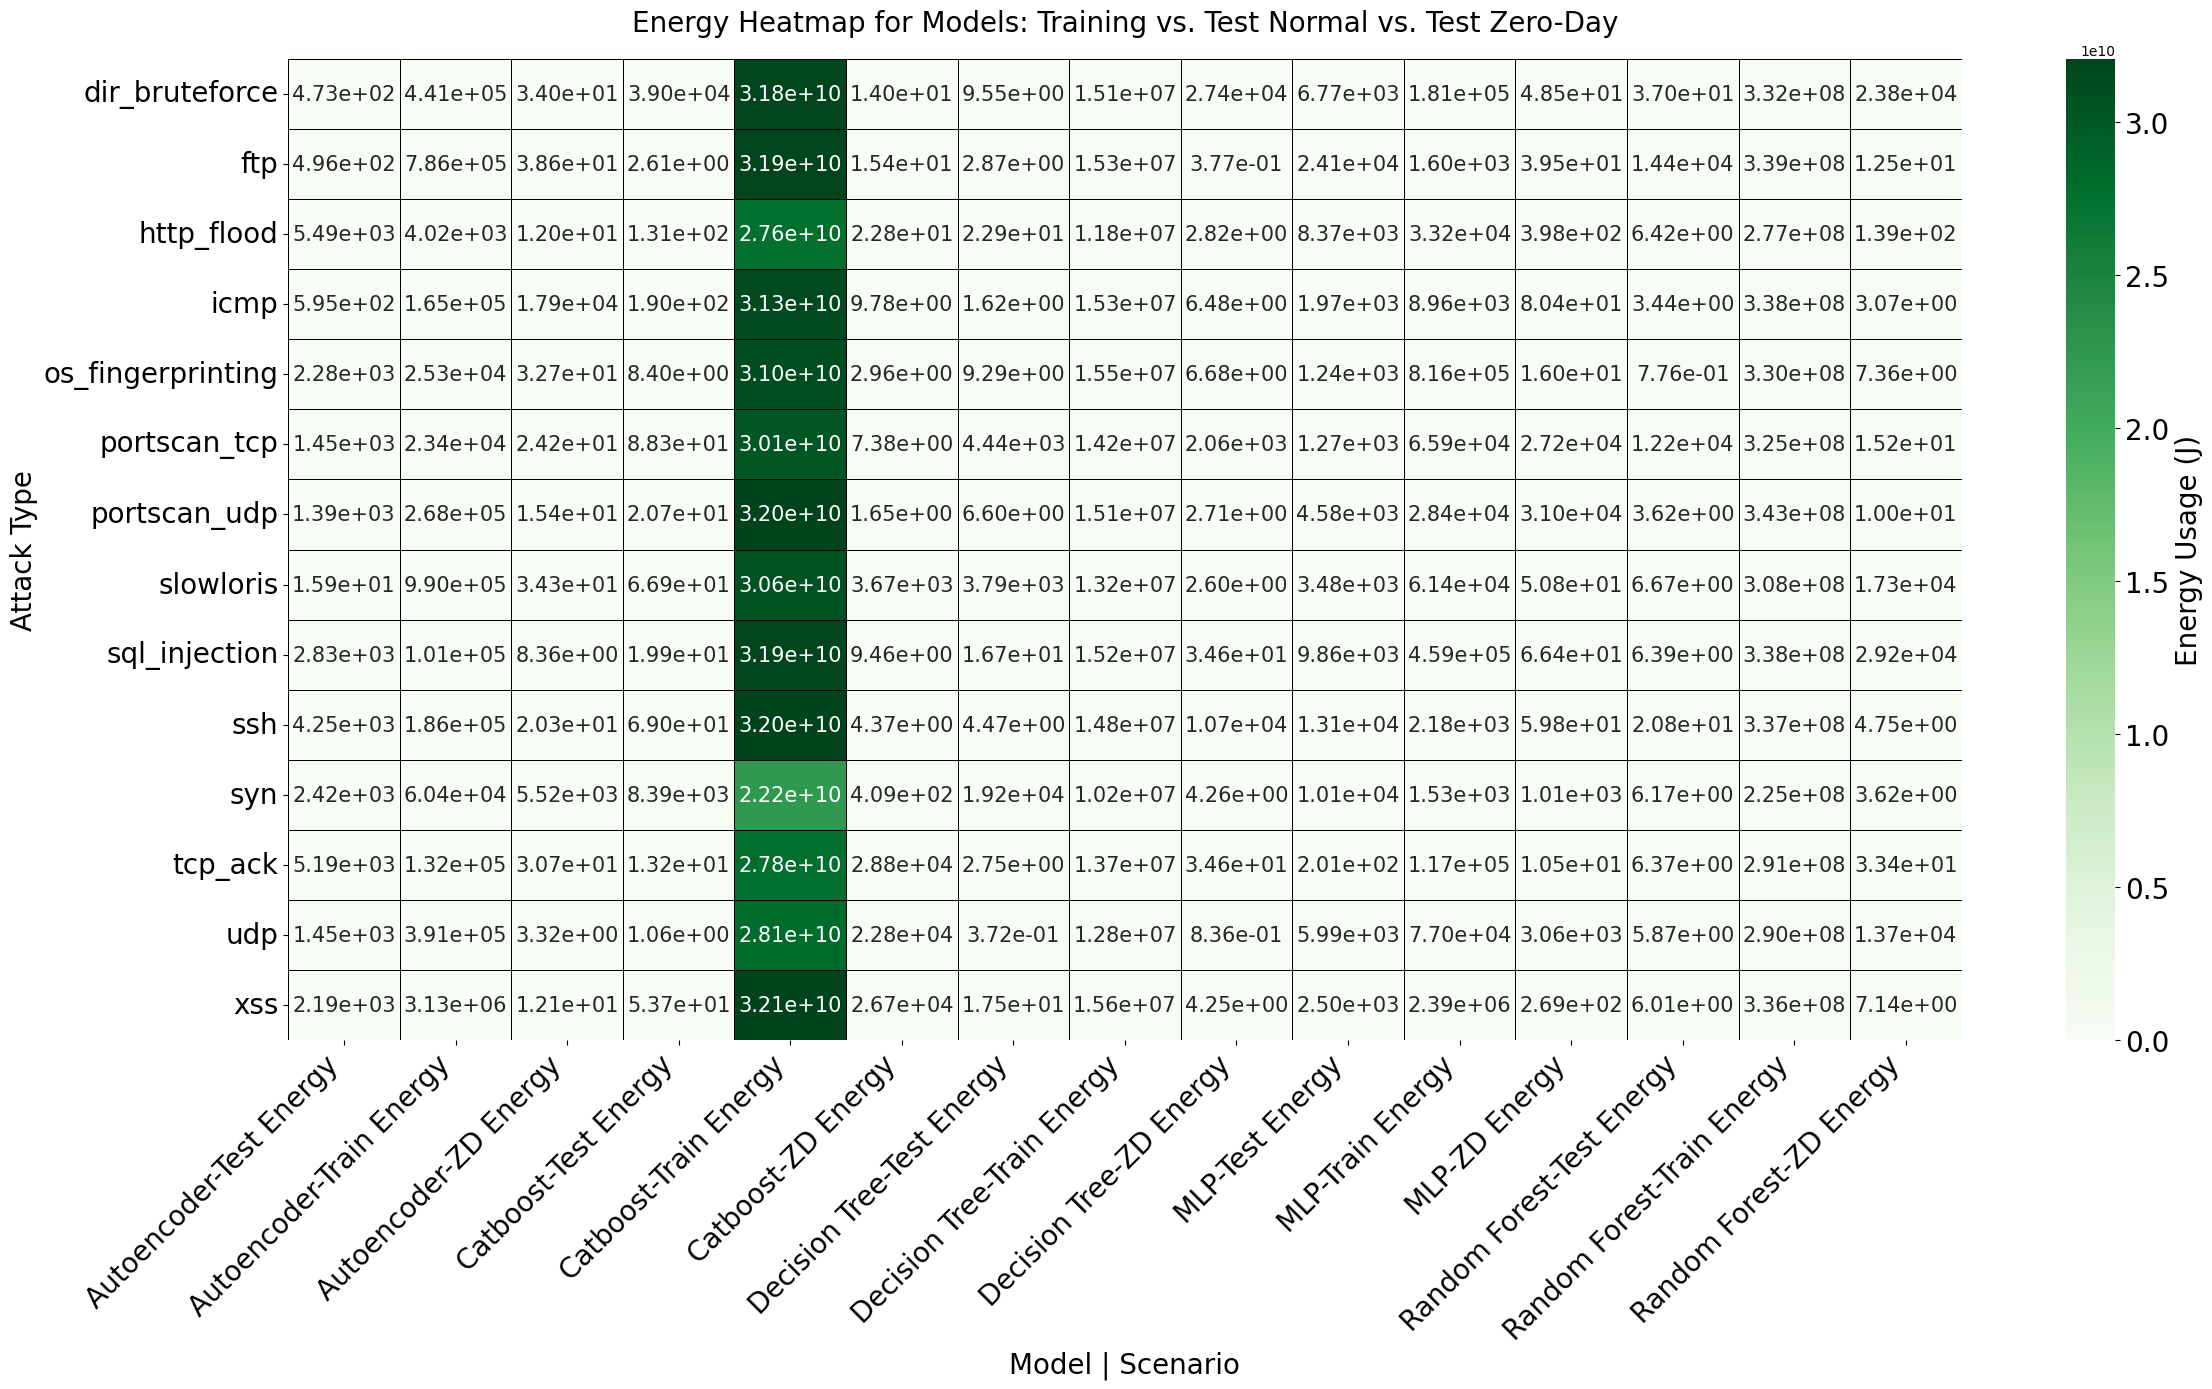

In [101]:
# Selecionar e renomear colunas do DataFrame de Treinamento
df_energy_train = df_train[['Model', 'attack', 'energy_train']].rename(
    columns={'attack': 'Attack', 'energy_train': 'Train Energy'}
)

# Selecionar e renomear colunas do DataFrame de Teste
df_energy_test = df_test[['Model', 'Ataque Zero-Day', 'Energy', 'ZD - Energy']].rename(
    columns={'Ataque Zero-Day': 'Attack', 'Energy': 'Test Energy', 'ZD - Energy': 'ZD Energy'}
)

# Mesclar os DataFrames de Energia
df_energy_combined = pd.merge(df_energy_train, df_energy_test, on=['Model', 'Attack'])

# Derreter (Melt) o DataFrame para ter o formato longo
df_melted_energy = df_energy_combined.melt(
    id_vars=['Model', 'Attack'],
    value_vars=['Train Energy', 'Test Energy', 'ZD Energy'],
    var_name='Scenario',
    value_name='Energy Usage (J)' # Unidade de Energia (Joules), pode precisar de ajuste na escala
)

# Pivotar para o formato do Heatmap (Attack vs. Model | Scenario)
df_pivot_energy = df_melted_energy.pivot_table(
    index='Attack',
    columns=['Model', 'Scenario'],
    values='Energy Usage (J)',
    aggfunc='mean'
)

# --- 3. Geração do Heatmap de Energia ---

# Se os valores de energia forem muito grandes é bom dividi-los por 1 milhão (MegaJoules) ou 1000 (KiloJoules)

#df_pivot_energy = df_pivot_energy / 1000000

plt.figure(figsize=(24, 14))

# Paleta de cores para Energia (usei "YlGnBu" - Amarelo-Verde-Azul)
ax = sns.heatmap(
    df_pivot_energy,
    annot=True,
    fmt=".2e",
    cmap="Greens", # Paleta de cores para Energia
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Energy Usage (J)'},
    annot_kws={"fontsize": 15}
)

# Estilização
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Ajuste do Label da Barra de Cor
cbar = ax.collections[0].colorbar
cbar.set_label('Energy Usage (J)', fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Adaptação do Título para Energia
plt.title('Energy Heatmap for Models: Training vs. Test Normal vs. Test Zero-Day', fontsize=20, pad=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.tight_layout()
plt.show()

## Time

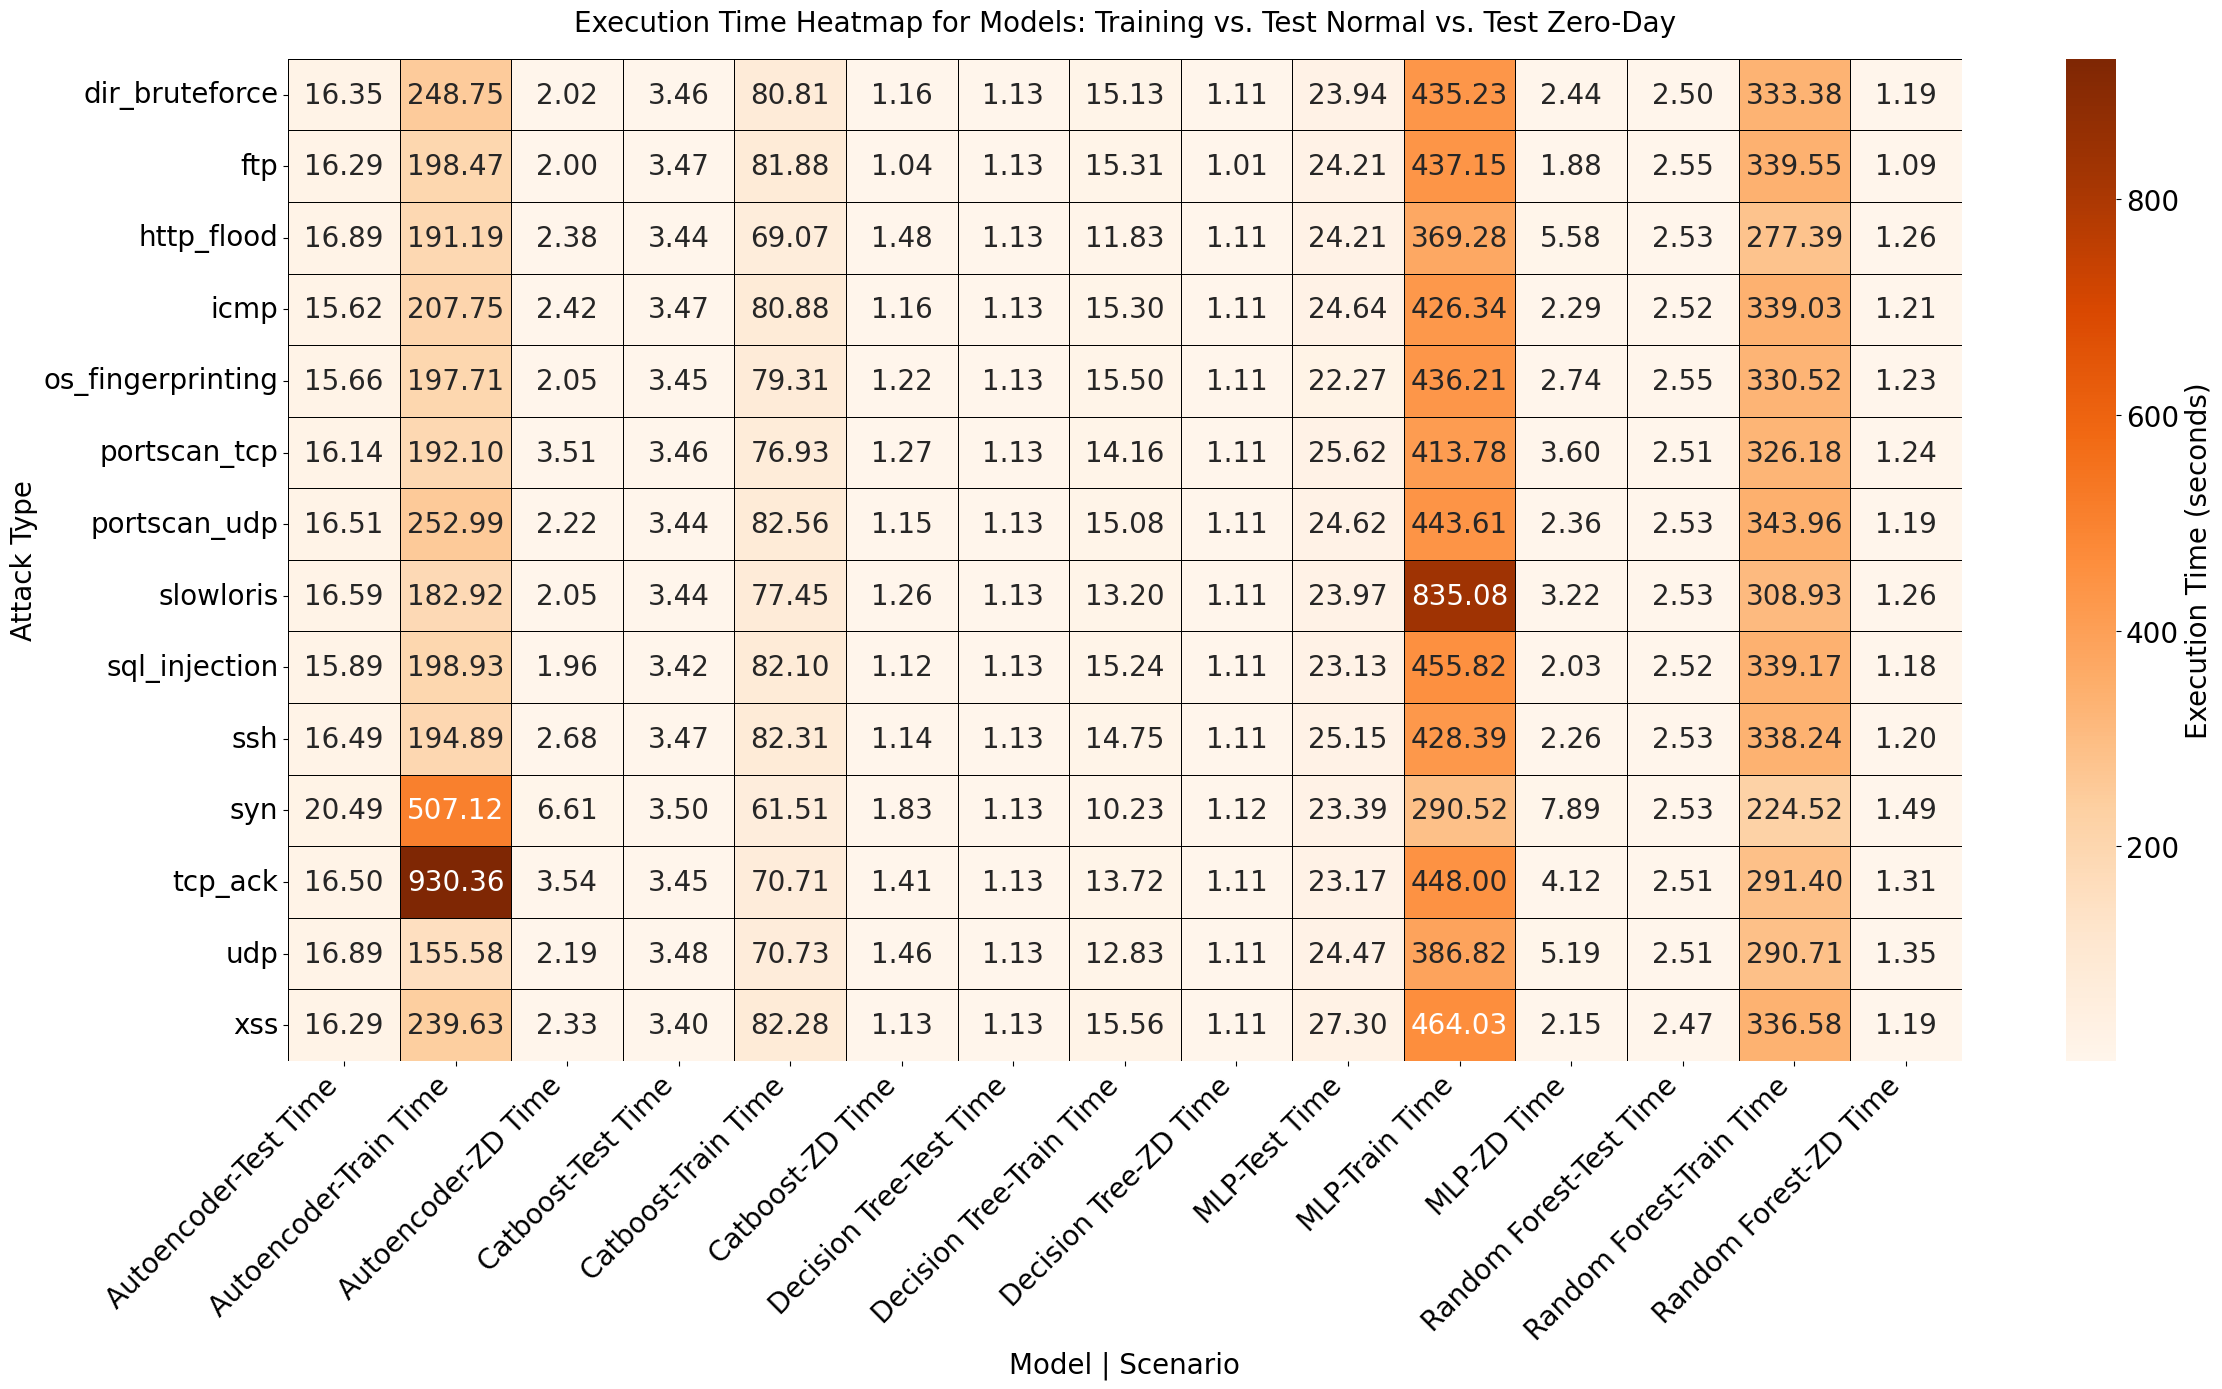

In [102]:
# Selecionar e renomear colunas do DataFrame de Treinamento
df_time_train = df_train[['Model', 'attack', 'total_time_train']].rename(
    columns={'attack': 'Attack', 'total_time_train': 'Train Time'}
)

# Selecionar e renomear colunas do DataFrame de Teste
df_time_test = df_test[['Model', 'Ataque Zero-Day', 'Time', 'ZD - Time']].rename(
    columns={'Ataque Zero-Day': 'Attack', 'Time': 'Test Time', 'ZD - Time': 'ZD Time'}
)

# Mesclar os DataFrames de Tempo
df_time_combined = pd.merge(df_time_train, df_time_test, on=['Model', 'Attack'])

# Derreter (Melt) o DataFrame para ter o formato longo
df_melted_time = df_time_combined.melt(
    id_vars=['Model', 'Attack'],
    value_vars=['Train Time', 'Test Time', 'ZD Time'],
    var_name='Scenario',
    value_name='Execution Time (s)' # Unidade de Tempo (Segundos)
)

# Pivotar para o formato do Heatmap (Attack vs. Model | Scenario)
df_pivot_time = df_melted_time.pivot_table(
    index='Attack',
    columns=['Model', 'Scenario'],
    values='Execution Time (s)',
    aggfunc='mean'
)

# --- 3. Geração do Heatmap de Tempo de Execução ---

plt.figure(figsize=(24, 14))

# Paleta de cores para Tempo (Sugestão: "Blues" ou "PuBuGn" - Cores frias para tempo)
ax = sns.heatmap(
    df_pivot_time,
    annot=True,
    fmt=".2f",
    cmap="Oranges", # Paleta de cores para Tempo
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Execution Time (seconds)'},
    annot_kws={"fontsize": 20} # Mantido em 14 para legibilidade dos números
)

# Estilização com fontsize=20
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Ajuste do Label da Barra de Cor
cbar = ax.collections[0].colorbar
cbar.set_label('Execution Time (seconds)', fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Adaptação do Título para Tempo
plt.title('Execution Time Heatmap for Models: Training vs. Test Normal vs. Test Zero-Day', fontsize=20, pad=20)
plt.xlabel('Model | Scenario', fontsize=20)
plt.ylabel('Attack Type', fontsize=20)

plt.tight_layout()
plt.show()